# 1- Perkenalan

> Bab pengenalan harus diisi dengan identitas, gambaran besar dataset yang digunakan, dan objective yang ingin dicapai.

Nama : Hillidatul Ilmi

Batch : FTDS-012

Dataset : Rideshare dari kaggle 'https://www.kaggle.com/datasets/brllrb/uber-and-lyft-dataset-boston-ma'

Objective : Memprediksi harga perjalanan platform ride-hailing. Sebagai Data Science, saya akan melakuan analisis mengenai hubungan antara variabel harga(terget/y) berupa harga perjalanan platform ride-hailing terhadap satu atau lebih variabel (fitur/X) berupa faktor-faktor yang mempengaruhi harga perjalanan. Saya akan melakukan prediksi harga perjalanan dari beberapa fitur yang bisa mendukung.

# 2 - Import Libraries

> Cell pertama pada notebook harus berisi dan hanya berisi semua library yang digunakan dalam project.

Import libraries digunakan untuk mendukung beberapa perintah sintaks yang akan di jalankan. Pada proses machine learning graded challenge 1 akan menggunakan library sebagai berikut :

In [1]:
# Mendefinisikan Libraries

!pip install feature-engine
import pandas as pd # library series pandas yang berfungsi menampilkan n*n dataset
import numpy as np # libray NumPy berfungsi untuk membuat mendefinisikan objek N-dimensi array
import matplotlib.pyplot as plt # library matplotlib berfungsi untuk membuat beberapa perubahan berupa visualisasti data
import seaborn as sns # library seabron berfungsi sebagai visualisasi data yang dibangun di atas matplotlib untuk membuat grafik 
import plotly.express as px #library plotly berfungsi untuk pembuatan plot yang tersedia dalam data
from sklearn.model_selection import train_test_split # library yang digunakan untuk membagi seluruh dataset menjadi Training Set dan Testing Set dalam proses hasil prediksi 
from feature_engine.outliers import Winsorizer # library yang digunakan untuk capping/membatasi outlier dari distribusi maksimum/minimum pada nilai yang berubah-ubah
from sklearn.preprocessing import OrdinalEncoder # library yang berfungsi mengurutkan data kategorik menjadi data numerik
from sklearn.preprocessing import MinMaxScaler # library yang berfungsi untuk menskalakan nilai data ke dalam suatu range menjadi sama antar fitur/X
from sklearn.preprocessing import OneHotEncoder # library yang berfungsi untuk mendefinisikan kolom kategorik menjadi kolom numerik
from sklearn.linear_model import LinearRegression # library yang mendefinisikan algoritma metode linear regresi untuk model evaluasi dan model training
from sklearn.metrics import mean_absolute_error # library MAE yang mendefinisikan metriks algoritma dari linear regresi
from sklearn.metrics import r2_score # library R^2 yang mendefinisikan metriks algoritma dari linear regresi sama seperti MAE

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


# 3 - Data Loading

> Bagian ini berisi proses penyiapan data sebelum dilakukan eksplorasi data lebih lanjut. Proses Data Loading dapat berupa memberi nama baru untuk setiap kolom, mengecek ukuran dataset, dll.

Menampilkan atau memproses dataset berupa CSV dari drive

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [3]:
# Menampilkan data yang akan digunakan dalam analisis atau memuat dari kumpulan data 
data = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/Data/rideshare_kaggle.csv')
data

,id,timestamp,hour,day,month,datetime,timezone,source,destination,cab_type,...,precipIntensityMax,uvIndexTime,temperatureMin,temperatureMinTime,temperatureMax,temperatureMaxTime,apparentTemperatureMin,apparentTemperatureMinTime,apparentTemperatureMax,apparentTemperatureMaxTime
0,424553bb-7174-41ea-aeb4-fe06d4f4b9d7,1.544953e+09,9,16,12,2018-12-16 09:30:07,America/New_York,Haymarket Square,North Station,Lyft,...,0.1276,1544979600,39.89,1545012000,43.68,1544968800,33.73,1545012000,38.07,1544958000
1,4bd23055-6827-41c6-b23b-3c491f24e74d,1.543284e+09,2,27,11,2018-11-27 02:00:23,America/New_York,Haymarket Square,North Station,Lyft,...,0.1300,1543251600,40.49,1543233600,47.30,1543251600,36.20,1543291200,43.92,1543251600
2,981a3613-77af-4620-a42a-0c0866077d1e,1.543367e+09,1,28,11,2018-11-28 01:00:22,America/New_York,Haymarket Square,North Station,Lyft,...,0.1064,1543338000,35.36,1543377600,47.55,1543320000,31.04,1543377600,44.12,1543320000
3,c2d88af2-d278-4bfd-a8d0-29ca77cc5512,1.543554e+09,4,30,11,2018-11-30 04:53:02,America/New_York,Haymarket Square,North Station,Lyft,...,0.0000,1543507200,34.67,1543550400,45.03,1543510800,30.30,1543550400,38.53,1543510800
4,e0126e1f-8ca9-4f2e-82b3-50505a09db9a,1.543463e+09,3,29,11,2018-11-29 03:49:20,America/New_York,Haymarket Square,North Station,Lyft,...,0.0001,1543420800,33.10,1543402800,42.18,1543420800,29.11,1543392000,35.75,1543420800
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
693066,616d3611-1820-450a-9845-a9ff304a4842,1.543708e+09,23,1,12,2018-12-01 23:53:05,America/New_York,West End,North End,Uber,...,0.0000,1543683600,31.42,1543658400,44.76,1543690800,27.77,1543658400,44.09,1543690800
693067,633a3fc3-1f86-4b9e-9d48-2b7132112341,1.543708e+09,23,1,12,2018-12-01 23:53:05,America/New_York,West End,North End,Uber,...,0.0000,1543683600,31.42,1543658400,44.76,1543690800,27.77,1543658400,44.09,1543690800
693068,64d451d0-639f-47a4-9b7c-6fd92fbd264f,1.543708e+09,23,1,12,2018-12-01 23:53:05,America/New_York,West End,North End,Uber,...,0.0000,1543683600,31.42,1543658400,44.76,1543690800,27.77,1543658400,44.09,1543690800
693069,727e5f07-a96b-4ad1-a2c7-9abc3ad55b4e,1.543708e+09,23,1,12,2018-12-01 23:53:05,America/New_York,West End,North End,Uber,...,0.0000,1543683600,31.42,1543658400,44.76,1543690800,27.77,1543658400,44.09,1543690800


In [4]:
# Mengandakan(duplicate) dataset nya, jika ada perubahan kolom atau atribut tetap bisa dibandingkan dengan dataset asli
# Fungsi dari pengandaan agar data asli masih bisa digunakan jika ada beberapa perubahan isi dari dataset
data_copy = data.copy()

In [5]:
# Mengecek ukuran dataset yang akan digunakan
print(data.shape)

(693071, 57)


Berdasarkan perintah .shape bahwa ukuran dataset rideshare terdiri dari 693071 baris dan 57 kolom.

In [6]:
# Melihat Nama-Nama kolom dari tabel dataset rideshare
data.columns

Index(['id', 'timestamp', 'hour', 'day', 'month', 'datetime', 'timezone',
       'source', 'destination', 'cab_type', 'product_id', 'name', 'price',
       'distance', 'surge_multiplier', 'latitude', 'longitude', 'temperature',
       'apparentTemperature', 'short_summary', 'long_summary',
       'precipIntensity', 'precipProbability', 'humidity', 'windSpeed',
       'windGust', 'windGustTime', 'visibility', 'temperatureHigh',
       'temperatureHighTime', 'temperatureLow', 'temperatureLowTime',
       'apparentTemperatureHigh', 'apparentTemperatureHighTime',
       'apparentTemperatureLow', 'apparentTemperatureLowTime', 'icon',
       'dewPoint', 'pressure', 'windBearing', 'cloudCover', 'uvIndex',
       'visibility.1', 'ozone', 'sunriseTime', 'sunsetTime', 'moonPhase',
       'precipIntensityMax', 'uvIndexTime', 'temperatureMin',
       'temperatureMinTime', 'temperatureMax', 'temperatureMaxTime',
       'apparentTemperatureMin', 'apparentTemperatureMinTime',
       'apparentTemperat

In [7]:
# Berdasarkan data.columns terdapat beberapa nama kolom yang membinggungkan secara arti makna kata
# Agar saya lebih mudah memahami masing-masing kolom, maka akan saya ubah beberapa nama kolomnya
# Perubahan nama kolom agar mempermudah dalam mendefinisikan data
# Saya akan mengubah seluruh nama kolom, agar lebih gampang memahami isi datanya
data.rename(columns={'timestamp': 'StempelWaktu','hour': 'jam', 'day':'hari','month': 'bulan', 'datetime':'TanggalWaktu','timezone': 'ZonaWaktu', 'source':'sumber','destination': 'tujuan', 
'name':'nama','price': 'harga', 'distance':'jarak','surge_multiplier': 'PenggandaLonjakan', 'temperature':'suhu','apparentTemperature': 'SuhuYangJelas', 
'short_summary':'RingkasanSingkat','long_summary': 'RingkasanPanjang', 'precipIntensity':'IntensitasTepi','precipProbability': 'ProbabilitasTepi', 
'humidity':'kelembaban','windSpeed': 'KecepatanAngin', 'windGust':'angin','windGustTime': 'WaktuHembusanAngin', 'visibility':'visibilitas','temperatureHigh': 'SuhuTinggi', 
'temperatureHighTime':'SuhuWaktuTinggi','temperatureLow': 'SuhuRendah', 'temperatureLowTime':'SuhuWaktuRendah','apparentTemperatureHigh': 'JelasSuhuTinggi', 
'apparentTemperatureHighTime':'JelasWaktuTinggiSuhu','apparentTemperatureLow': 'JelasSuhuRendah', 'apparentTemperatureLowTime':'JelasWaktuSuhuRendah',
'dewPoint': 'TitikEmbun','pressure': 'tekanan', 'windBearing':'BantalanAngin','cloudCover': 'PenutupAwan','uvIndex': 'IndeksUV', 'ozone':'ozon','moonPhase': 'FaseBulan',
'precipIntensityMax': 'TepiIntensitasMaks', 'uvIndexTime':'WaktuIndeksUV','temperatureMin': 'SuhuMinimum','temperatureMinTime': 'WaktuSuhuMinimum', 
'temperatureMax':'SuhuMaksimum','temperatureMaxTime': 'WaktuSuhuMaksimum','apparentTemperatureMin': 'JelasSuhuMinimum', 'apparentTemperatureMinTime':'JelasWaktuMininimum',
'apparentTemperatureMax': 'JelasSuhuMaksimum','apparentTemperatureMaxTime': 'JelasSuhuWaktuMaksimum',}, inplace=True)
data

,id,StempelWaktu,jam,hari,bulan,TanggalWaktu,ZonaWaktu,sumber,tujuan,cab_type,...,TepiIntensitasMaks,WaktuIndeksUV,SuhuMinimum,WaktuSuhuMinimum,SuhuMaksimum,WaktuSuhuMaksimum,JelasSuhuMinimum,JelasWaktuMininimum,JelasSuhuMaksimum,JelasSuhuWaktuMaksimum
0,424553bb-7174-41ea-aeb4-fe06d4f4b9d7,1.544953e+09,9,16,12,2018-12-16 09:30:07,America/New_York,Haymarket Square,North Station,Lyft,...,0.1276,1544979600,39.89,1545012000,43.68,1544968800,33.73,1545012000,38.07,1544958000
1,4bd23055-6827-41c6-b23b-3c491f24e74d,1.543284e+09,2,27,11,2018-11-27 02:00:23,America/New_York,Haymarket Square,North Station,Lyft,...,0.1300,1543251600,40.49,1543233600,47.30,1543251600,36.20,1543291200,43.92,1543251600
2,981a3613-77af-4620-a42a-0c0866077d1e,1.543367e+09,1,28,11,2018-11-28 01:00:22,America/New_York,Haymarket Square,North Station,Lyft,...,0.1064,1543338000,35.36,1543377600,47.55,1543320000,31.04,1543377600,44.12,1543320000
3,c2d88af2-d278-4bfd-a8d0-29ca77cc5512,1.543554e+09,4,30,11,2018-11-30 04:53:02,America/New_York,Haymarket Square,North Station,Lyft,...,0.0000,1543507200,34.67,1543550400,45.03,1543510800,30.30,1543550400,38.53,1543510800
4,e0126e1f-8ca9-4f2e-82b3-50505a09db9a,1.543463e+09,3,29,11,2018-11-29 03:49:20,America/New_York,Haymarket Square,North Station,Lyft,...,0.0001,1543420800,33.10,1543402800,42.18,1543420800,29.11,1543392000,35.75,1543420800
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
693066,616d3611-1820-450a-9845-a9ff304a4842,1.543708e+09,23,1,12,2018-12-01 23:53:05,America/New_York,West End,North End,Uber,...,0.0000,1543683600,31.42,1543658400,44.76,1543690800,27.77,1543658400,44.09,1543690800
693067,633a3fc3-1f86-4b9e-9d48-2b7132112341,1.543708e+09,23,1,12,2018-12-01 23:53:05,America/New_York,West End,North End,Uber,...,0.0000,1543683600,31.42,1543658400,44.76,1543690800,27.77,1543658400,44.09,1543690800
693068,64d451d0-639f-47a4-9b7c-6fd92fbd264f,1.543708e+09,23,1,12,2018-12-01 23:53:05,America/New_York,West End,North End,Uber,...,0.0000,1543683600,31.42,1543658400,44.76,1543690800,27.77,1543658400,44.09,1543690800
693069,727e5f07-a96b-4ad1-a2c7-9abc3ad55b4e,1.543708e+09,23,1,12,2018-12-01 23:53:05,America/New_York,West End,North End,Uber,...,0.0000,1543683600,31.42,1543658400,44.76,1543690800,27.77,1543658400,44.09,1543690800


In [8]:
# Melihat Nama-Nama kolom dari tabel dataset rideshare yang telah diubah
data.columns

Index(['id', 'StempelWaktu', 'jam', 'hari', 'bulan', 'TanggalWaktu',
       'ZonaWaktu', 'sumber', 'tujuan', 'cab_type', 'product_id', 'nama',
       'harga', 'jarak', 'PenggandaLonjakan', 'latitude', 'longitude', 'suhu',
       'SuhuYangJelas', 'RingkasanSingkat', 'RingkasanPanjang',
       'IntensitasTepi', 'ProbabilitasTepi', 'kelembaban', 'KecepatanAngin',
       'angin', 'WaktuHembusanAngin', 'visibilitas', 'SuhuTinggi',
       'SuhuWaktuTinggi', 'SuhuRendah', 'SuhuWaktuRendah', 'JelasSuhuTinggi',
       'JelasWaktuTinggiSuhu', 'JelasSuhuRendah', 'JelasWaktuSuhuRendah',
       'icon', 'TitikEmbun', 'tekanan', 'BantalanAngin', 'PenutupAwan',
       'IndeksUV', 'visibility.1', 'ozon', 'sunriseTime', 'sunsetTime',
       'FaseBulan', 'TepiIntensitasMaks', 'WaktuIndeksUV', 'SuhuMinimum',
       'WaktuSuhuMinimum', 'SuhuMaksimum', 'WaktuSuhuMaksimum',
       'JelasSuhuMinimum', 'JelasWaktuMininimum', 'JelasSuhuMaksimum',
       'JelasSuhuWaktuMaksimum'],
      dtype='object')

Nama-Nama kolom telah diubah, sehingga akan lebih mudah memahami makna data dan lebih mudah menafsirkan definisi setip data.

In [9]:
# Mengecek informasi dataset nya
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 693071 entries, 0 to 693070
Data columns (total 57 columns):
 #   Column                  Non-Null Count   Dtype  
---  ------                  --------------   -----  
 0   id                      693071 non-null  object 
 1   StempelWaktu            693071 non-null  float64
 2   jam                     693071 non-null  int64  
 3   hari                    693071 non-null  int64  
 4   bulan                   693071 non-null  int64  
 5   TanggalWaktu            693071 non-null  object 
 6   ZonaWaktu               693071 non-null  object 
 7   sumber                  693071 non-null  object 
 8   tujuan                  693071 non-null  object 
 9   cab_type                693071 non-null  object 
 10  product_id              693071 non-null  object 
 11  nama                    693071 non-null  object 
 12  harga                   637976 non-null  float64
 13  jarak                   693071 non-null  float64
 14  PenggandaLonjakan   

Berdasarkan perintah data.info() dari semua 57 kolom, terdapat 17 kolom bertipe integral atau numerik dan terdapat 11 kolom bertipe object atau kategorik.

# 4 - Exploratory Data Analysis (EDA)

> Bagian ini berisi eksplorasi data pada dataset diatas dengan menggunakan query, grouping, visualisasi sederhana, dan lain sebagainya.


Nilai Skewness Harga Perjalanan:  1.0457470560899256


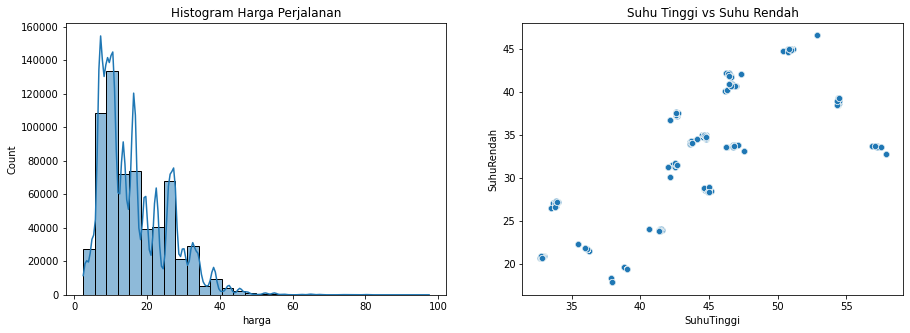

In [10]:
# EDA yang akan saya tampilkan berupa visualisasi gambar
# Menampilkan Histogram and Scatter Plot

# Visualisasi histogram untuk melihat besaran harga perjalanan
plt.figure(figsize=(15, 5)) # Ukuran histogram yang akan tertampilkan
plt.subplot(1, 2, 1) # 1 menyatakan baris, 2 menyatakan kolom , 1 menyatakan indeks nya
sns.histplot(data['harga'], bins=30, kde=True) # Membuat histogram kolom harga dari data, dimana garis line distribusi berukuran 30 dari nilai data benar
plt.title('Histogram Harga Perjalanan') # Memberikan Judul/definisi histogram yang tertampil
print('\nNilai Skewness Harga Perjalanan: ', data['harga'].skew()) # Melihat nilai skewness distribus data harga

#visualisasi scatterplot hubungan antara suhu rendah dan suhu tinggi mengenai harga perjalanan
plt.subplot(1, 2, 2) # 1 menyatakan baris, 2 menyatakan kolom , 2 menyatakan indeks antara perjam dan perhari
sns.scatterplot(x='SuhuTinggi', y='SuhuRendah', data=data) # Hubungan data garis vertikal berupa suhu rendah dengan data garis horizontal berupa suhu tinggi
plt.title('Suhu Tinggi vs Suhu Rendah') # Memberikan Judul/definisi scatterplot yang tertampil
plt.show() # Manampilkan visulisasi yang terlah terbentuk

Keterangan Dari Visualisasi gambar di atas :

1. Visualisasi histogram data harga penjalanan diatas dinyatakan berdistribusi normal karena memiliki nilai rasio skewness berada pada rentang nilai -2 sampai 2, yaitu sebesar 1.04. Harga Penjalanan memiliki bentuk data distribusi normal miring sebelah kiri, yang berarti kumpulan data berada di sisi ekor kiri. Berdasarkan visualisasi histogram juga terlihat kebanyakan dataset harga perjalanan para penumpang berkumpul di set harga 10 sampai 15, dengan jumlah transaksi perjalanan Uber and Lyft Dataset Boston MA sebanyak 130000+.
2. Dari bentuk grafik yang dihasilkan, maka grafik dari Scatterplot diatas dinyatakan memiliki hubungan Positif (korelasi Positif) yang artinya hubungan Suhu Tinggi tehadap Suhu Rendah akan mengakibatkan tingkat keburukan harga perjalanan yang tinggi, terlihat dari visualisasi yang semakin meningkat keatas. Jadi jika ingin mengurangi tingkat kemahalan harga perjalanan, salah satu tindakan yang harus dilakukan adalah mengurangi perjalanan di suhu tinggi.

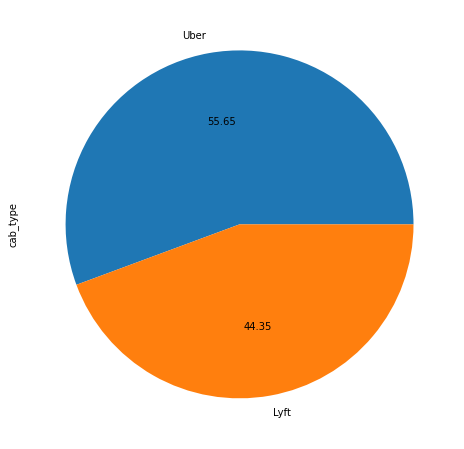

In [11]:
data['cab_type'].value_counts().plot(kind='pie', figsize=(8,8), autopct='%.2f')

Keterangan Dari Visualisasi gambar di atas :

Dikutip dari uber.com, bahwa Uber adalah perusahaan penyedia transportasi asal San Francisco, California yang menghubungkan penumpang dengan supir kendaraan sewaan serta layanan tumpangan langsung. Sedangkan kutipan dari lyft.com, bahwa Lyft adalah sebuah perusahaan jaringan transportasi di Amerika Serikat yang menyediakan jasa berbagi tumpangan dan berkantor pusat di San Francisco, California. 

Berdasarkan definisi, bahwa uber dan lyft merupakan dua jasa pelayanan transfortasi terbesar di amerika. Dimana untuk wilayah Boston, MA para pelanggan lebih mendominasi menggunakan jasa pelayanan uber sebesar 55.65% sedangkan jasa pelayan lyft berada di bawah uber dengan jumlah penlanggan yang menggunakan sebesar 44.35%.

In [12]:
# statistika deskriptif dataset rideshare
data.describe()

,StempelWaktu,jam,hari,bulan,harga,jarak,PenggandaLonjakan,latitude,longitude,suhu,...,TepiIntensitasMaks,WaktuIndeksUV,SuhuMinimum,WaktuSuhuMinimum,SuhuMaksimum,WaktuSuhuMaksimum,JelasSuhuMinimum,JelasWaktuMininimum,JelasSuhuMaksimum,JelasSuhuWaktuMaksimum
count,6.930710e+05,693071.000000,693071.000000,693071.000000,637976.000000,693071.000000,693071.000000,693071.000000,693071.000000,693071.000000,...,693071.000000,6.930710e+05,693071.000000,6.930710e+05,693071.000000,6.930710e+05,693071.000000,6.930710e+05,693071.000000,6.930710e+05
mean,1.544046e+09,11.619137,17.794365,11.586684,16.545125,2.189430,1.013870,42.338172,-71.066151,39.584388,...,0.037374,1.544044e+09,33.457774,1.544042e+09,45.261313,1.544047e+09,29.731002,1.544048e+09,41.997343,1.544048e+09
std,6.891925e+05,6.948114,9.982286,0.492429,9.324359,1.138937,0.091641,0.047840,0.020302,6.726084,...,0.055214,6.912028e+05,6.467224,6.901954e+05,5.645046,6.901353e+05,7.110494,6.871862e+05,6.936841,6.910777e+05
min,1.543204e+09,0.000000,1.000000,11.000000,2.500000,0.020000,1.000000,42.214800,-71.105400,18.910000,...,0.000000,1.543162e+09,15.630000,1.543122e+09,33.510000,1.543154e+09,11.810000,1.543136e+09,28.950000,1.543187e+09
25%,1.543444e+09,6.000000,13.000000,11.000000,9.000000,1.280000,1.000000,42.350300,-71.081000,36.450000,...,0.000000,1.543421e+09,30.170000,1.543399e+09,42.570000,1.543439e+09,27.760000,1.543399e+09,36.570000,1.543439e+09
50%,1.543737e+09,12.000000,17.000000,12.000000,13.500000,2.160000,1.000000,42.351900,-71.063100,40.490000,...,0.000400,1.543770e+09,34.240000,1.543727e+09,44.680000,1.543788e+09,30.130000,1.543745e+09,40.950000,1.543788e+09
75%,1.544828e+09,18.000000,28.000000,12.000000,22.500000,2.920000,1.000000,42.364700,-71.054200,43.580000,...,0.091600,1.544807e+09,38.880000,1.544789e+09,46.910000,1.544814e+09,35.710000,1.544789e+09,44.120000,1.544818e+09
max,1.545161e+09,23.000000,30.000000,12.000000,97.500000,7.860000,3.000000,42.366100,-71.033000,57.220000,...,0.145900,1.545152e+09,43.100000,1.545192e+09,57.870000,1.545109e+09,40.050000,1.545134e+09,57.200000,1.545109e+09


Keterangan dari analisis statistika deskriptif di atas adalah :

Rata-rata harga perjalanan sebesar 16.5 dengan nilai tengah(Q2) sebesar 13.5, nilai rata-rata dan nilai tengah saling berdekatan, hal ini menandakan bahwa harga perjalanan berada dalam distribusi normal. Harga perjalanan transfortasi yang sering menjadi acuan dari jasa pelayanan paling sedikit/murah adalah 2.5 dan paling tertinggi/mahal adalah 97.5. Harga perjalanan dari transfortasi memiliki nilai standar deviasi sebesar 9, yang berarti sebaran sampel data jauh dari rata-rata nilai sampel itu sendiri. Misalnya rata-rata harga perjalanan seitar 16,5 tetapi terdapat jumlah harga di luar jangkauan pada umumnya sebesar 9 data, 9 data tersebut memiliki nilai lebih besar dari 97.5.

# 5 - Data Preprocessing

> Bagian ini berisi proses penyiapan data untuk proses pelatihan model, seperti pembagian data menjadi train-dev-test, transformasi data (normalisasi, encoding, dll.), dan proses-proses lain yang dibutuhkan.

## a. - Data Inference

Dikutip dari aws.amazon.com, Inferensi adalah proses membuat prediksi menggunakan model terlatih. Model inference adalah data yang tidak tersedia di dalam dataset, jika dicari datanya tidak ada, maka di masukkan data baru. Jadi model inference itu data baru yang tidak ada di data set. Data inference menggunakan dataset yang ada.

Dataset terbagi menjadi dua yaitu inference set dan Non inference set (Train set & Test set)

In [13]:
# INFERENCE SET
# Dapatkan Data untuk Inferensi Model

datainfernce1 = data.sample(10, random_state=17) # menggunakan pandas sampel dengan memangil 10 data random, data inference cukup 5 atau 10 saja
#random_state itu gunakan agar random state yang terpilih tetap sama
datainfernce1.shape

(10, 57)

Terdapat 10 data yang tidak tersedia di dalam dataset rideshare.

In [14]:
# NON INFERENCE SET
# Hapus Kumpulan Inferensi dari Kumpulan Data

data_train_test1 = data.drop(datainfernce1.index)
data_train_test1.shape

(693061, 57)

Dataset awal rideshare memiliki 693071 baris kemudian hilangkan kumpulan data inference dari rideshare menjadi 693061, berkurang 10 data. Data_train_test ini yang akan digunakan untuk x_test dan y_test.

## b. - Splitting Dataset Rideshare

Splitting Data merupakan pemisahan untuk membuat X sebagai fitur dan Y sebagai target menjadi Train/Test. Train/test split sebagai salah satu metode yang dapat digunakan untuk mengevaluasi performa model machine learning. 

In [15]:
# Pemisahan `X` (Fitur) dan `y` (Target)

X1 = data_train_test1.drop('harga', axis=1) #menghapus kolom axis=1 harga, untuk dimasukkan dan dibagi menjadi train/test
y1 = data_train_test1['harga']

Drop kolom harga untuk 80% masuk ke x dan 20% masuk ke y, untuk splitting data di gunakan train_test_split

In [16]:
# Train-Set and Test-Set
# Memasukkan nilai x dan y, test_size artinya split 80% untuk train, dan 20% untuk test
X_train1, X_test1, y_train1, y_test1 = train_test_split(X1, y1, test_size=0.2, random_state=10)
print('Train Size : ', X_train1.shape)
print('Test Size : ', X_test1.shape)

Train Size :  (554448, 56)
Test Size :  (138613, 56)


Setelah dilakukan pemisahan training set dan testing set, diperoleh ukuran train sebesar 55448 baris dan 56 kolom, serta ukuran test sebesar 138613 baris dan 56 kolom.

## c. - Data Cleaning/Feature Engineering

Dikutip dari springboard.com, 60 % perkerjaan data scinece adalah pembersihan data. Data Cleaning adalah proses mempersiapkan data untuk analisis dengan menghapus atau memodifikasi data yang tidak benar, tidak lengkap, tidak relevan, diduplikasi, atau diformat dengan tidak benar. Data ini biasanya tidak diperlukan atau membantu dalam menganalisis data karena dapat menghambat proses atau memberikan hasil yang tidak akurat. Data Cleaning terbagi menjadi 2 bagian penting yaitu handling missing value dan handling outlier.

### c1-Handling Missing Values

Dikutip dari file.upi.edu.com, Missing value adalah informasi yang tidak tersedia untuk sebuah objek (kasus). Missing value terjadi karena informasi untuk sesuatu tentang objek tidak diberikan, sulit dicari, atau memang informasi tersebut tidak ada.
Pada proses ini akan dilakukan pengecekan data missing value dengan .info() terlebih dahulu :

In [17]:
# Mengecek Missing Values on X_train
X_train1.isnull().sum()

id                        0
StempelWaktu              0
jam                       0
hari                      0
bulan                     0
TanggalWaktu              0
ZonaWaktu                 0
sumber                    0
tujuan                    0
cab_type                  0
product_id                0
nama                      0
jarak                     0
PenggandaLonjakan         0
latitude                  0
longitude                 0
suhu                      0
SuhuYangJelas             0
RingkasanSingkat          0
RingkasanPanjang          0
IntensitasTepi            0
ProbabilitasTepi          0
kelembaban                0
KecepatanAngin            0
angin                     0
WaktuHembusanAngin        0
visibilitas               0
SuhuTinggi                0
SuhuWaktuTinggi           0
SuhuRendah                0
SuhuWaktuRendah           0
JelasSuhuTinggi           0
JelasWaktuTinggiSuhu      0
JelasSuhuRendah           0
JelasWaktuSuhuRendah      0
icon                

In [18]:
# Mengecek Missing Values on X_test
X_test1.isnull().sum()

id                        0
StempelWaktu              0
jam                       0
hari                      0
bulan                     0
TanggalWaktu              0
ZonaWaktu                 0
sumber                    0
tujuan                    0
cab_type                  0
product_id                0
nama                      0
jarak                     0
PenggandaLonjakan         0
latitude                  0
longitude                 0
suhu                      0
SuhuYangJelas             0
RingkasanSingkat          0
RingkasanPanjang          0
IntensitasTepi            0
ProbabilitasTepi          0
kelembaban                0
KecepatanAngin            0
angin                     0
WaktuHembusanAngin        0
visibilitas               0
SuhuTinggi                0
SuhuWaktuTinggi           0
SuhuRendah                0
SuhuWaktuRendah           0
JelasSuhuTinggi           0
JelasWaktuTinggiSuhu      0
JelasSuhuRendah           0
JelasWaktuSuhuRendah      0
icon                

In [19]:
# Mengecek Missing Values on y_train
y_train1.isnull().sum()

44105

In [20]:
# Mengecek Missing Values on y_test

y_test1.isnull().sum()

10989

Diperoleh bahwa spliting data X_train1 dan X_test1 tidak ada missing value, akan tetapi untuk data y_train1 dan y_test1 terdapat missing value.

> Karena ada Missing value pada spiliting data y_train dan y_test maka akan di lakukan drop pada baris yang memiliki missing value nya. Akan tetapi jika hanya akan menghapus baris y(target), bisa menimbulkan ukuran dimensi dari matriks dataset rideshare berbeda, ukuran baris antara X (fitur) dan y (target) berbeda. Oleh karena itu akan di lakukan penghapusan baris yang mengandung missing value, SERTA MENGULANG KEMBALI STEP PROCESING AGAR DIMENSI UKURAN SPLITING DATA SAMA SEMUA.

In [21]:
# Manghapus missing value
data.dropna(axis=0,inplace=True)

--- DATA INFERENCE

In [22]:
# PENGULANGAN TAHAP DATA INFERENCE TANPA MISSING VALUE
# Dapatkan Data untuk Inferensi Model

datainfernce = data.sample(10, random_state=17) # menggunakan pandas sampel dengan memangil 10 data random, data inference cukup 5 atau 10 saja
#random_state itu gunakan agar random state yang terpilih tetap sama
datainfernce #Diasumsikan terdapat 10 harga peralanan yang tidak ada di dalam dataset rideshare

,id,StempelWaktu,jam,hari,bulan,TanggalWaktu,ZonaWaktu,sumber,tujuan,cab_type,...,TepiIntensitasMaks,WaktuIndeksUV,SuhuMinimum,WaktuSuhuMinimum,SuhuMaksimum,WaktuSuhuMaksimum,JelasSuhuMinimum,JelasWaktuMininimum,JelasSuhuMaksimum,JelasSuhuWaktuMaksimum
150284,1e45e179-546a-48a9-9c48-3af210ba4067,1.543362e+09,23,27,11,2018-11-27 23:42:22,America/New_York,Back Bay,Boston University,Lyft,...,0.1438,1543338000,36.37,1543377600,46.74,1543320000,32.60,1543377600,43.93,1543320000
99887,44fd1122-034f-416c-a90e-f965c2aa1fef,1.543627e+09,1,1,12,2018-12-01 01:13:08,America/New_York,South Station,Theatre District,Lyft,...,0.0004,1543593600,28.42,1543579200,42.05,1543600800,29.07,1543579200,41.38,1543600800
58493,1c70a635-5cc2-462b-a650-ecf99c4dc249,1.543776e+09,18,2,12,2018-12-02 18:33:03,America/New_York,South Station,Theatre District,Uber,...,0.0894,1543770000,36.40,1543726800,50.94,1543788000,35.78,1543748400,50.27,1543788000
419011,689accd2-480a-4b9d-ba74-c30f568d31b6,1.543331e+09,15,27,11,2018-11-27 15:09:22,America/New_York,Theatre District,North End,Uber,...,0.1422,1543338000,35.90,1543377600,46.72,1543320000,31.81,1543377600,43.70,1543320000
484995,17989773-8ee3-4e20-a816-6082be328726,1.543608e+09,19,30,11,2018-11-30 19:53:14,America/New_York,Beacon Hill,Boston University,Lyft,...,0.0004,1543593600,28.64,1543575600,42.57,1543600800,27.20,1543568400,40.51,1543611600
660187,54019c66-428f-4805-9053-8672a37eb914,1.544723e+09,17,13,12,2018-12-13 17:50:14,America/New_York,North End,West End,Uber,...,0.0001,1544716800,17.91,1544688000,33.81,1544731200,13.47,1544688000,32.82,1544734800
239609,88a4920b-df82-4dad-af3f-c88afab096ec,1.544878e+09,12,15,12,2018-12-15 12:50:11,America/New_York,South Station,Beacon Hill,Uber,...,0.0079,1544893200,39.71,1544929200,54.43,1544896800,36.49,1544929200,53.76,1544896800
154837,6f7d44a1-f3d3-4a69-9acf-6085e5930df5,1.544820e+09,20,14,12,2018-12-14 20:35:05,America/New_York,Financial District,North End,Lyft,...,0.0000,1544806800,27.07,1544788800,46.45,1544814000,27.72,1544788800,43.71,1544817600
683350,5d8920a7-8b94-49f8-b15b-b68244caea16,1.543278e+09,0,27,11,2018-11-27 00:15:12,America/New_York,Boston University,North Station,Lyft,...,0.1225,1543251600,40.45,1543233600,46.49,1543255200,37.17,1543291200,43.84,1543244400
49385,003594e9-8b16-4f15-9529-f9f0406d3f6c,1.543537e+09,0,30,11,2018-11-30 00:22:56,America/New_York,South Station,Theatre District,Lyft,...,0.0000,1543510800,34.84,1543550400,45.12,1543510800,30.80,1543550400,39.02,1543510800


Terdapat 10 data dari rideshare terdapat di bagian inference.

In [23]:
# NON INFERENCE SET
# Hapus Kumpulan Inferensi dari Kumpulan Data

data_train_test = data.drop(datainfernce.index)
data_train_test

,id,StempelWaktu,jam,hari,bulan,TanggalWaktu,ZonaWaktu,sumber,tujuan,cab_type,...,TepiIntensitasMaks,WaktuIndeksUV,SuhuMinimum,WaktuSuhuMinimum,SuhuMaksimum,WaktuSuhuMaksimum,JelasSuhuMinimum,JelasWaktuMininimum,JelasSuhuMaksimum,JelasSuhuWaktuMaksimum
0,424553bb-7174-41ea-aeb4-fe06d4f4b9d7,1.544953e+09,9,16,12,2018-12-16 09:30:07,America/New_York,Haymarket Square,North Station,Lyft,...,0.1276,1544979600,39.89,1545012000,43.68,1544968800,33.73,1545012000,38.07,1544958000
1,4bd23055-6827-41c6-b23b-3c491f24e74d,1.543284e+09,2,27,11,2018-11-27 02:00:23,America/New_York,Haymarket Square,North Station,Lyft,...,0.1300,1543251600,40.49,1543233600,47.30,1543251600,36.20,1543291200,43.92,1543251600
2,981a3613-77af-4620-a42a-0c0866077d1e,1.543367e+09,1,28,11,2018-11-28 01:00:22,America/New_York,Haymarket Square,North Station,Lyft,...,0.1064,1543338000,35.36,1543377600,47.55,1543320000,31.04,1543377600,44.12,1543320000
3,c2d88af2-d278-4bfd-a8d0-29ca77cc5512,1.543554e+09,4,30,11,2018-11-30 04:53:02,America/New_York,Haymarket Square,North Station,Lyft,...,0.0000,1543507200,34.67,1543550400,45.03,1543510800,30.30,1543550400,38.53,1543510800
4,e0126e1f-8ca9-4f2e-82b3-50505a09db9a,1.543463e+09,3,29,11,2018-11-29 03:49:20,America/New_York,Haymarket Square,North Station,Lyft,...,0.0001,1543420800,33.10,1543402800,42.18,1543420800,29.11,1543392000,35.75,1543420800
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
693065,353e6566-b272-479e-a9c6-98bd6cb23f25,1.543708e+09,23,1,12,2018-12-01 23:53:05,America/New_York,West End,North End,Uber,...,0.0000,1543683600,31.42,1543658400,44.76,1543690800,27.77,1543658400,44.09,1543690800
693066,616d3611-1820-450a-9845-a9ff304a4842,1.543708e+09,23,1,12,2018-12-01 23:53:05,America/New_York,West End,North End,Uber,...,0.0000,1543683600,31.42,1543658400,44.76,1543690800,27.77,1543658400,44.09,1543690800
693067,633a3fc3-1f86-4b9e-9d48-2b7132112341,1.543708e+09,23,1,12,2018-12-01 23:53:05,America/New_York,West End,North End,Uber,...,0.0000,1543683600,31.42,1543658400,44.76,1543690800,27.77,1543658400,44.09,1543690800
693069,727e5f07-a96b-4ad1-a2c7-9abc3ad55b4e,1.543708e+09,23,1,12,2018-12-01 23:53:05,America/New_York,West End,North End,Uber,...,0.0000,1543683600,31.42,1543658400,44.76,1543690800,27.77,1543658400,44.09,1543690800


In [24]:
data.shape

(637976, 57)

Ketika belum manghapus baris missing value, Dataset awal rideshare memiliki 693071 baris kemudian hilangkan data inference dari rideshare menjadi 693061. Tetapi setelah menghapus baris missing value, Dataset rideshare memiliki 637976 baris atau telah menghapus 55095 baris. Kemudian di pisah dari data inference sehingga dataset rideshare menjadi 637966 baris.

In [25]:
# Reset Index
# Agar tidak terjadi yang tidak diinginkan, data di reset index nya

data_train_test.reset_index(drop=True, inplace=True) #drop true menghapus index lama kemudian di bentuk ulang dari inplace=true
datainfernce.reset_index(drop=True, inplace=True)
datainfernce

,id,StempelWaktu,jam,hari,bulan,TanggalWaktu,ZonaWaktu,sumber,tujuan,cab_type,...,TepiIntensitasMaks,WaktuIndeksUV,SuhuMinimum,WaktuSuhuMinimum,SuhuMaksimum,WaktuSuhuMaksimum,JelasSuhuMinimum,JelasWaktuMininimum,JelasSuhuMaksimum,JelasSuhuWaktuMaksimum
0,1e45e179-546a-48a9-9c48-3af210ba4067,1.543362e+09,23,27,11,2018-11-27 23:42:22,America/New_York,Back Bay,Boston University,Lyft,...,0.1438,1543338000,36.37,1543377600,46.74,1543320000,32.60,1543377600,43.93,1543320000
1,44fd1122-034f-416c-a90e-f965c2aa1fef,1.543627e+09,1,1,12,2018-12-01 01:13:08,America/New_York,South Station,Theatre District,Lyft,...,0.0004,1543593600,28.42,1543579200,42.05,1543600800,29.07,1543579200,41.38,1543600800
2,1c70a635-5cc2-462b-a650-ecf99c4dc249,1.543776e+09,18,2,12,2018-12-02 18:33:03,America/New_York,South Station,Theatre District,Uber,...,0.0894,1543770000,36.40,1543726800,50.94,1543788000,35.78,1543748400,50.27,1543788000
3,689accd2-480a-4b9d-ba74-c30f568d31b6,1.543331e+09,15,27,11,2018-11-27 15:09:22,America/New_York,Theatre District,North End,Uber,...,0.1422,1543338000,35.90,1543377600,46.72,1543320000,31.81,1543377600,43.70,1543320000
4,17989773-8ee3-4e20-a816-6082be328726,1.543608e+09,19,30,11,2018-11-30 19:53:14,America/New_York,Beacon Hill,Boston University,Lyft,...,0.0004,1543593600,28.64,1543575600,42.57,1543600800,27.20,1543568400,40.51,1543611600
5,54019c66-428f-4805-9053-8672a37eb914,1.544723e+09,17,13,12,2018-12-13 17:50:14,America/New_York,North End,West End,Uber,...,0.0001,1544716800,17.91,1544688000,33.81,1544731200,13.47,1544688000,32.82,1544734800
6,88a4920b-df82-4dad-af3f-c88afab096ec,1.544878e+09,12,15,12,2018-12-15 12:50:11,America/New_York,South Station,Beacon Hill,Uber,...,0.0079,1544893200,39.71,1544929200,54.43,1544896800,36.49,1544929200,53.76,1544896800
7,6f7d44a1-f3d3-4a69-9acf-6085e5930df5,1.544820e+09,20,14,12,2018-12-14 20:35:05,America/New_York,Financial District,North End,Lyft,...,0.0000,1544806800,27.07,1544788800,46.45,1544814000,27.72,1544788800,43.71,1544817600
8,5d8920a7-8b94-49f8-b15b-b68244caea16,1.543278e+09,0,27,11,2018-11-27 00:15:12,America/New_York,Boston University,North Station,Lyft,...,0.1225,1543251600,40.45,1543233600,46.49,1543255200,37.17,1543291200,43.84,1543244400
9,003594e9-8b16-4f15-9529-f9f0406d3f6c,1.543537e+09,0,30,11,2018-11-30 00:22:56,America/New_York,South Station,Theatre District,Lyft,...,0.0000,1543510800,34.84,1543550400,45.12,1543510800,30.80,1543550400,39.02,1543510800


Dibagian datainference indexnya tidak terurut karena menyesuaikan letak baris, tetapi setelah di reset indek jadi tersusun index nomornya. Agar ketika dijalankan sampai bawah atau proses selesai jika ada keselahan hasil, sudah dipastikan bukan karena index nya berantakan atau tidak beraturan.

--- SPLITING DATASET RIDESHARE

In [26]:
# Pemisahan `X` (Fitur) dan `y` (Target)

X = data_train_test.drop('harga', axis=1) #menghapus kolom axis=1 harga, untuk dimasukkan dan dibagi menjadi train/test
y = data_train_test['harga']

In [27]:
# Split between Train-Set and Test-Set

# Memasukkan nilai x dan y, test_size artinya split 80% untuk train, dan 20% untuk test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=10)
print('Train Size : ', X_train.shape)
print('Test Size : ', X_test.shape)

Train Size :  (510372, 56)
Test Size :  (127594, 56)


Dilakukan proses Drop kolom harga perjalanan untuk dibagi, dari data train_test_split akan dipisah menjadi 80% harga masuk ke X_tarin dan 20% masuk ke y_train. X_train menggunakan 510372(80%) dari 637976 baris dan y_train menggunakan 127594 (sisa 20%) dri 637976 baris.

--- Handling Missing Value

In [28]:
# Mengecek Missing Values on X_train
X_train.isnull().sum()

id                        0
StempelWaktu              0
jam                       0
hari                      0
bulan                     0
TanggalWaktu              0
ZonaWaktu                 0
sumber                    0
tujuan                    0
cab_type                  0
product_id                0
nama                      0
jarak                     0
PenggandaLonjakan         0
latitude                  0
longitude                 0
suhu                      0
SuhuYangJelas             0
RingkasanSingkat          0
RingkasanPanjang          0
IntensitasTepi            0
ProbabilitasTepi          0
kelembaban                0
KecepatanAngin            0
angin                     0
WaktuHembusanAngin        0
visibilitas               0
SuhuTinggi                0
SuhuWaktuTinggi           0
SuhuRendah                0
SuhuWaktuRendah           0
JelasSuhuTinggi           0
JelasWaktuTinggiSuhu      0
JelasSuhuRendah           0
JelasWaktuSuhuRendah      0
icon                

In [29]:
# Mengecek Missing Values on X_train
X_test.isnull().sum()

id                        0
StempelWaktu              0
jam                       0
hari                      0
bulan                     0
TanggalWaktu              0
ZonaWaktu                 0
sumber                    0
tujuan                    0
cab_type                  0
product_id                0
nama                      0
jarak                     0
PenggandaLonjakan         0
latitude                  0
longitude                 0
suhu                      0
SuhuYangJelas             0
RingkasanSingkat          0
RingkasanPanjang          0
IntensitasTepi            0
ProbabilitasTepi          0
kelembaban                0
KecepatanAngin            0
angin                     0
WaktuHembusanAngin        0
visibilitas               0
SuhuTinggi                0
SuhuWaktuTinggi           0
SuhuRendah                0
SuhuWaktuRendah           0
JelasSuhuTinggi           0
JelasWaktuTinggiSuhu      0
JelasSuhuRendah           0
JelasWaktuSuhuRendah      0
icon                

In [30]:
# Mengecek Missing Values on X_train
y_train.isnull().sum()

0

In [31]:
# Mengecek Missing Values on X_train
y_test.isnull().sum()

0

Setelah di lakukan proses handling missing value maka variabel X_train, X_test, y_train dan y_test sudah bersih dari Nan data. Selanjutnya akan dilakukan handling outlier.

### c2-Handling Outlier

Dikutik dari statistika.com, Data Outlier disebut juga dengan data pencilan. Pengertian dari Outlier adalah data observasi yang muncul dengan nilai-nilai ekstrim, baik secara univariat ataupun multivariat. Yang dimaksud dengan nilai-nilai ekstrim dalam observasi adalah nilai yang jauh atau beda sama sekali dengan sebagian besar nilai lain dalam kelompoknya.

Untuk mengatasi nilai outlier, saya memilih metode Censoring. Censoring atau capping, berfungsi untuk membatasi distribusi maksimum atau minimum pada nilai yang berubah-ubah. Pengubahan skala agar masuk ke dalam boxplot. Saya tidak memilih metode Trimming atau penghapusan, agar dimensi ukuran metriks nya tetap sama dan jumlah data masih terjaga.

--- PENGECEKAN DISTRIBUSI DAN BOXPLOT

In [32]:
# Berfungsi untuk membuat histogram dan boxplot.
# Fungsi ini menggunakan kerangka data (df) dan variabel yang diinginkan sebagai argumen.

def diagnostic_plots(data, variable):
    # Define figure size
    plt.figure(figsize=(16, 4))

    # Histogram
    plt.subplot(1, 2, 1)
    sns.histplot(data[variable], bins=30)
    plt.title('Histogram')

    # Boxplot
    plt.subplot(1, 2, 2)
    sns.boxplot(y=data[variable])
    plt.title('Boxplot')

    plt.show()

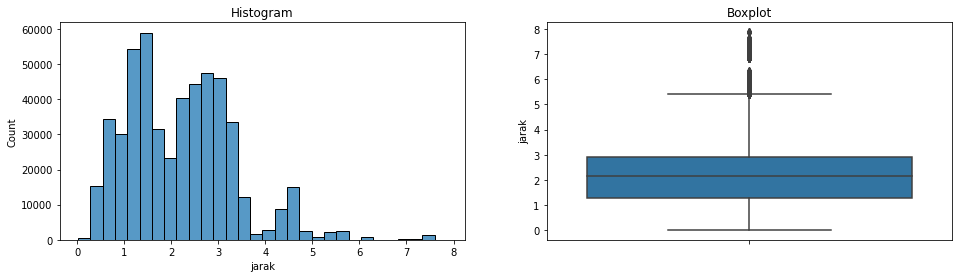


Skewness Value jarak:  0.8206855840888276


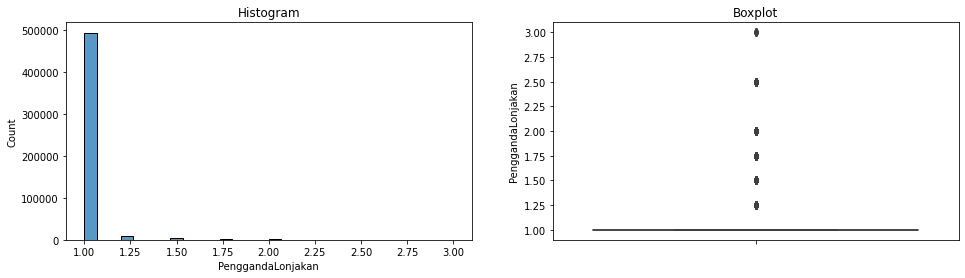


Skewness Value Pengganda Lonjakan:  7.932719664332541


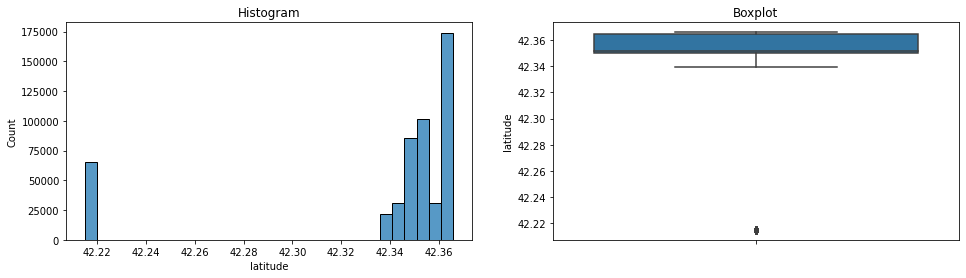


Skewness Value latitude:  -2.110947371215386


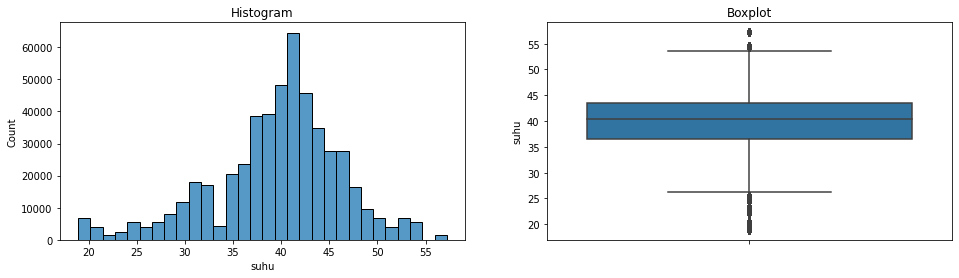


Skewness Value suhu:  -0.6099206938737721


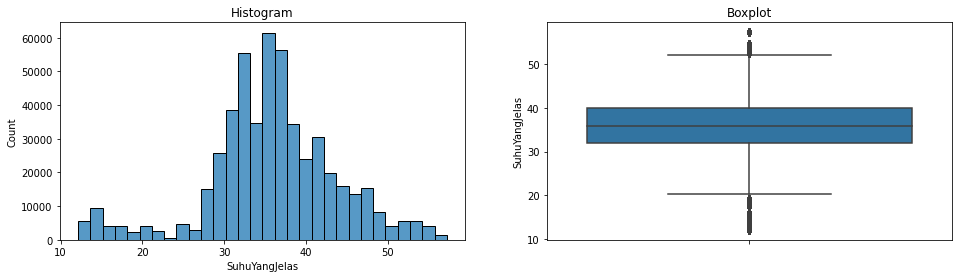


Skewness Value Suhu Yang Jelas:  -0.39652145050715


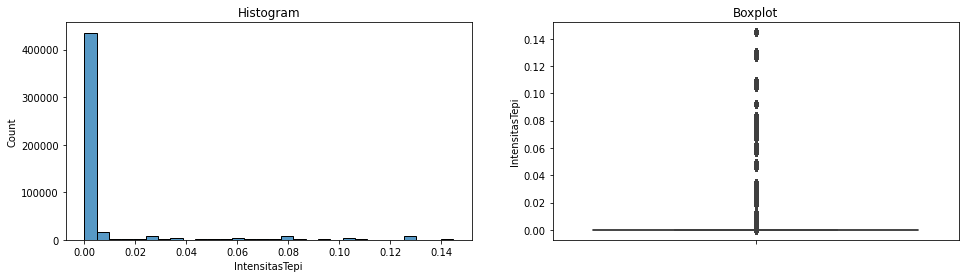


Skewness Value Intensitas Tepi:  3.330681720493032


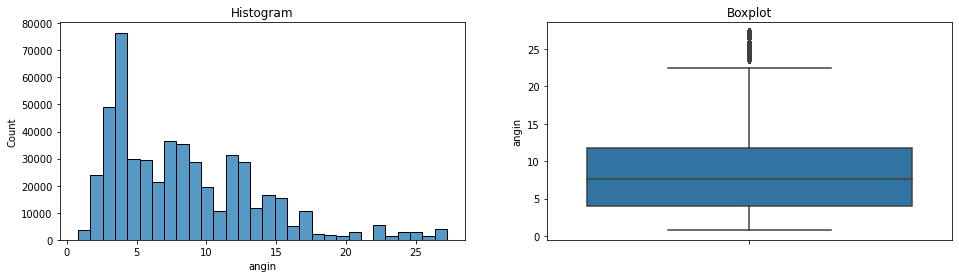


Skewness Value angin:  1.1192612735486092


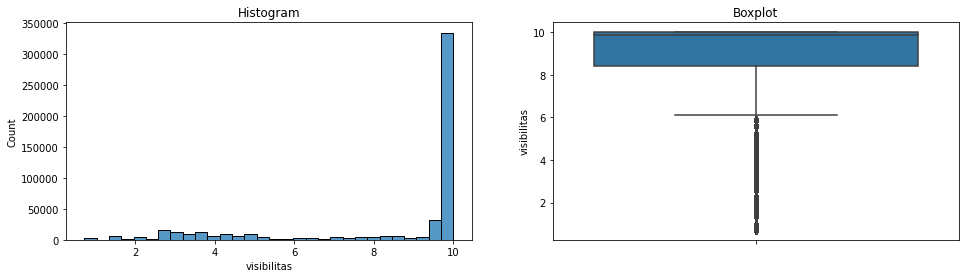


Skewness Value visibilitas:  -1.5074001087259377


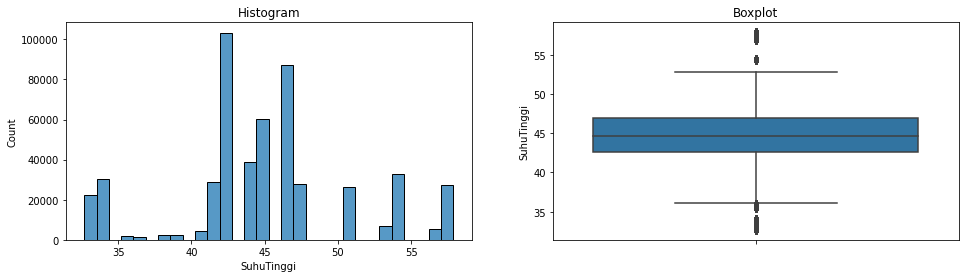


Skewness Value Suhu Tinggi:  0.0762072017795599


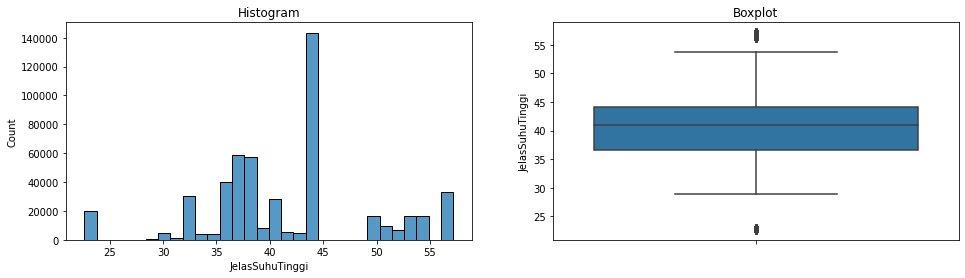


Skewness Value Jelas Suhu Tinggi:  0.06711861229920688


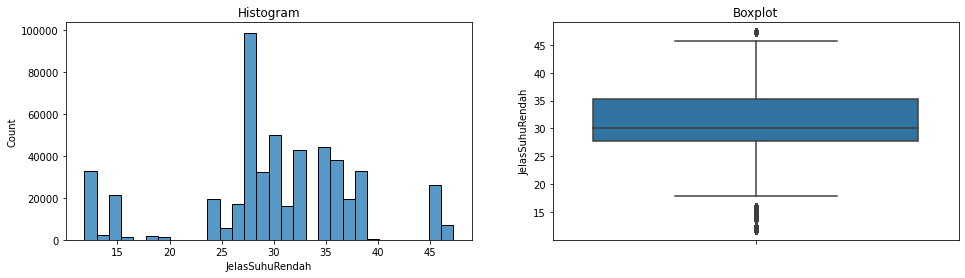


Skewness Value Jelas Suhu Rendah:  -0.501400930701366


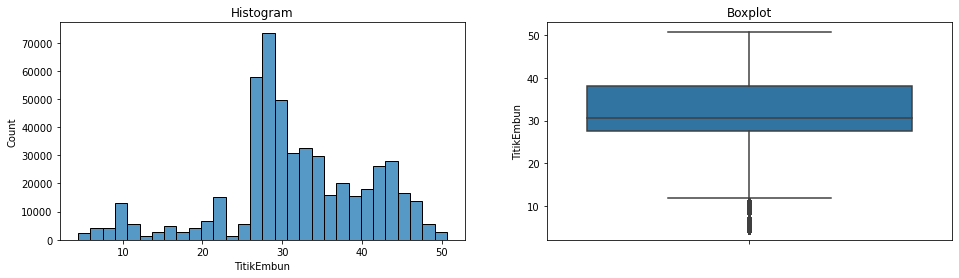


Skewness Value Titik Embun:  -0.4973722724878355


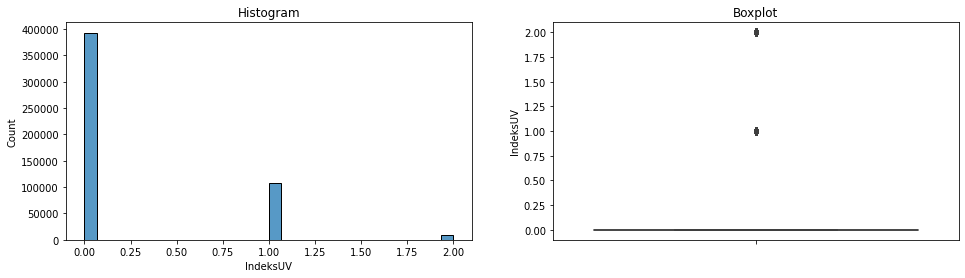


Skewness Value Indeks UV:  1.6820145509718323


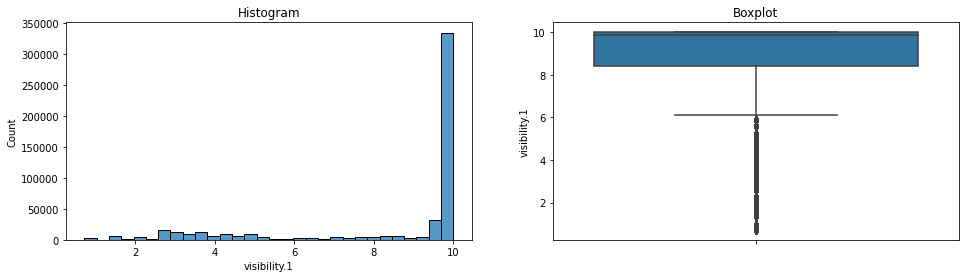


Skewness Value visibility.1:  -1.5074001087259377


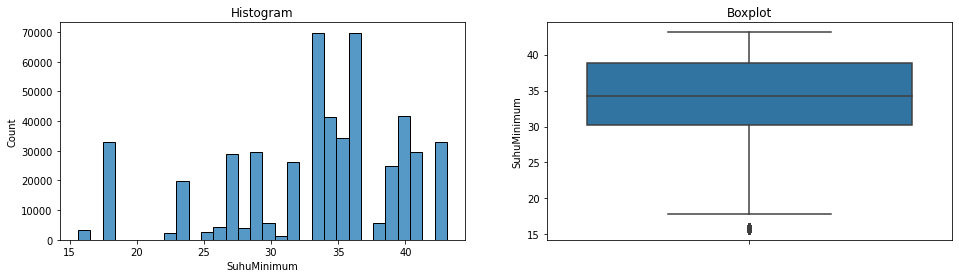


Skewness Value Suhu Minimum:  -0.8683557719484699


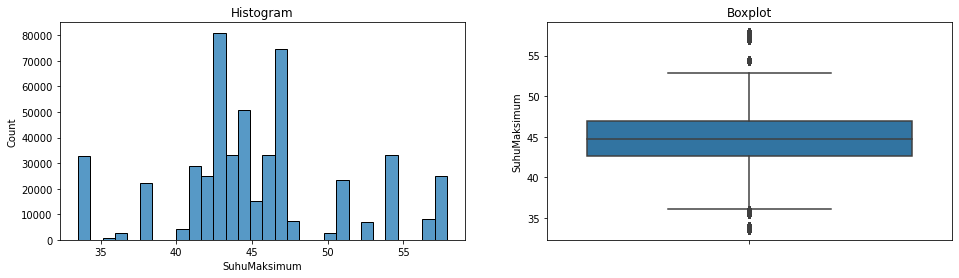


Skewness Value Suhu Maksimum:  0.30106756696013814


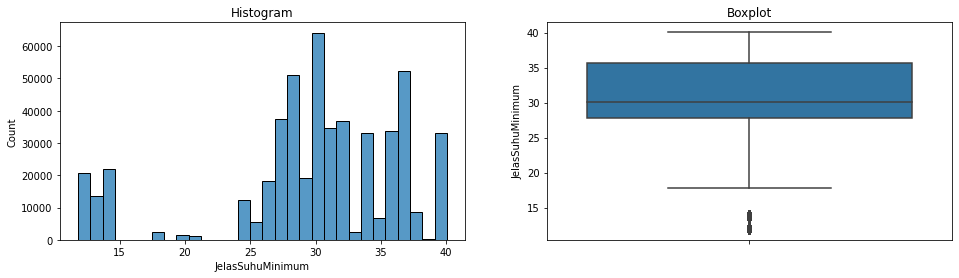


Skewness Value Jelas Suhu Minimum:  -1.1074691324596397


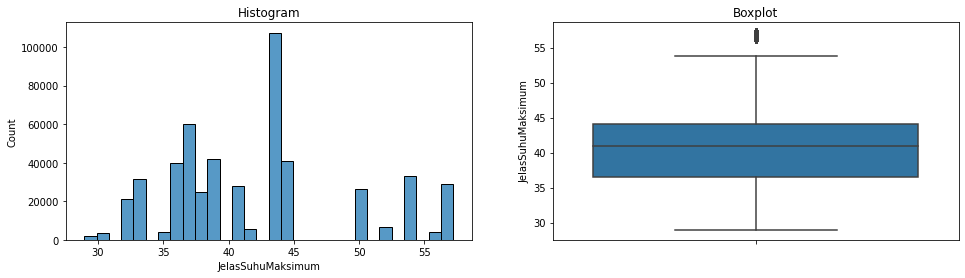


Skewness Value Jelas Suhu Maksimum:  0.6104131397541706


In [33]:
# SEBELUMNYA SUDAH SEMUA VARIABEL DI CEK, SEHINGGA SAYA HANYA MENAMPILKAN DATA YANG TIDAK NORMAL DAN TERDAPAT OUTLIER
# UNTUK DATA BERDISTRIBUSI NORMAL DAN TIDAK MENGANDUNG OUTLIER, TIDAK AKAN DI TAMPILKAN

# diagnostic_plots(X_train, 'StempelWaktu')
# print('\nSkewness Value Stempel Waktu: ', X_train['StempelWaktu'].skew())

# diagnostic_plots(X_train, 'jam')
# print('\nSkewness Value jam: ', X_train['jam'].skew())

# diagnostic_plots(X_train, 'hari')
# print('\nSkewness Value hari: ', X_train['hari'].skew())

# diagnostic_plots(X_train, 'bulan')
# print('\nSkewness Value bulan: ', X_train['bulan'].skew())

diagnostic_plots(X_train, 'jarak')
print('\nSkewness Value jarak: ', X_train['jarak'].skew())

diagnostic_plots(X_train, 'PenggandaLonjakan')
print('\nSkewness Value Pengganda Lonjakan: ', X_train['PenggandaLonjakan'].skew())

diagnostic_plots(X_train, 'latitude')
print('\nSkewness Value latitude: ', X_train['latitude'].skew())

# diagnostic_plots(X_train, 'longitude')
# print('\nSkewness Value longitude: ', X_train['longitude'].skew())

diagnostic_plots(X_train, 'suhu')
print('\nSkewness Value suhu: ', X_train['suhu'].skew())

diagnostic_plots(X_train, 'SuhuYangJelas')
print('\nSkewness Value Suhu Yang Jelas: ', X_train['SuhuYangJelas'].skew())

diagnostic_plots(X_train, 'IntensitasTepi')
print('\nSkewness Value Intensitas Tepi: ', X_train['IntensitasTepi'].skew())

# diagnostic_plots(X_train, 'kelembaban')
# print('\nSkewness Value kelembaban: ', X_train['kelembaban'].skew())

# diagnostic_plots(X_train, 'KecepatanAngin')
# print('\nSkewness Value Kecepatan Angin: ', X_train['KecepatanAngin'].skew())

diagnostic_plots(X_train, 'angin')
print('\nSkewness Value angin: ', X_train['angin'].skew())

# diagnostic_plots(X_train, 'WaktuHembusanAngin')
# print('\nSkewness Value Waktu Hembusan Angin: ', X_train['WaktuHembusanAngin'].skew())

diagnostic_plots(X_train, 'visibilitas')
print('\nSkewness Value visibilitas: ', X_train['visibilitas'].skew())

diagnostic_plots(X_train, 'SuhuTinggi')
print('\nSkewness Value Suhu Tinggi: ', X_train['SuhuTinggi'].skew())

# diagnostic_plots(X_train, 'SuhuWaktuTinggi')
# print('\nSkewness Value Suhu Waktu Tinggi: ', X_train['SuhuWaktuTinggi'].skew())

# diagnostic_plots(X_train, 'SuhuRendah')
# print('\nSkewness Value Suhu Rendah: ', X_train['SuhuRendah'].skew())

# diagnostic_plots(X_train, 'SuhuWaktuRendah')
# print('\nSkewness Value Suhu Waktu Rendah: ', X_train['SuhuWaktuRendah'].skew())

diagnostic_plots(X_train, 'JelasSuhuTinggi')
print('\nSkewness Value Jelas Suhu Tinggi: ', X_train['JelasSuhuTinggi'].skew())

# diagnostic_plots(X_train, 'JelasWaktuTinggiSuhu')
# print('\nSkewness Value Jelas Waktu Tinggi Suhu: ', X_train['JelasWaktuTinggiSuhu'].skew())

diagnostic_plots(X_train, 'JelasSuhuRendah')
print('\nSkewness Value Jelas Suhu Rendah: ', X_train['JelasSuhuRendah'].skew())

# diagnostic_plots(X_train, 'JelasWaktuSuhuRendah')
# print('\nSkewness Value Jelas Waktu Suhu Rendah: ', X_train['JelasWaktuSuhuRendah'].skew())

diagnostic_plots(X_train, 'TitikEmbun')
print('\nSkewness Value Titik Embun: ', X_train['TitikEmbun'].skew())

# diagnostic_plots(X_train, 'tekanan')
# print('\nSkewness Value tekanan: ', X_train['tekanan'].skew())

# diagnostic_plots(X_train, 'BantalanAngin')
# print('\nSkewness Value Bantalan Angin: ', X_train['BantalanAngin'].skew())

# diagnostic_plots(X_train, 'PenutupAwan')
# print('\nSkewness Value Penutup Awan: ', X_train['PenutupAwan'].skew())

diagnostic_plots(X_train, 'IndeksUV')
print('\nSkewness Value Indeks UV: ', X_train['IndeksUV'].skew())

diagnostic_plots(X_train, 'visibility.1')
print('\nSkewness Value visibility.1: ', X_train['visibility.1'].skew())

# diagnostic_plots(X_train, 'ozon')
# print('\nSkewness Value ozon: ', X_train['ozon'].skew())

# diagnostic_plots(X_train, 'sunriseTime')
# print('\nSkewness Value sunrise Time: ', X_train['sunriseTime'].skew())

# diagnostic_plots(X_train, 'sunsetTime')
# print('\nSkewness Value sunset Time: ', X_train['sunsetTime'].skew())

# diagnostic_plots(X_train, 'FaseBulan')
# print('\nSkewness Value Fase Bulan: ', X_train['FaseBulan'].skew())

# diagnostic_plots(X_train, 'TepiIntensitasMaks')
# print('\nSkewness Value Tepi Intensitas Maks: ', X_train['TepiIntensitasMaks'].skew())

# diagnostic_plots(X_train, 'WaktuIndeksUV')
# print('\nSkewness Value Waktu Indeks UV: ', X_train['WaktuIndeksUV'].skew())

diagnostic_plots(X_train, 'SuhuMinimum')
print('\nSkewness Value Suhu Minimum: ', X_train['SuhuMinimum'].skew())

# diagnostic_plots(X_train, 'WaktuSuhuMinimum')
# print('\nSkewness Value Waktu Suhu Minimum: ', X_train['WaktuSuhuMinimum'].skew())

diagnostic_plots(X_train, 'SuhuMaksimum')
print('\nSkewness Value Suhu Maksimum: ', X_train['SuhuMaksimum'].skew())

# diagnostic_plots(X_train, 'WaktuSuhuMaksimum')
# print('\nSkewness Value Waktu Suhu Maksimum: ', X_train['WaktuSuhuMaksimum'].skew())

diagnostic_plots(X_train, 'JelasSuhuMinimum')
print('\nSkewness Value Jelas Suhu Minimum: ', X_train['JelasSuhuMinimum'].skew())

# diagnostic_plots(X_train, 'JelasWaktuMininimum')
# print('\nSkewness Value Jelas Waktu Mininimum: ', X_train['JelasWaktuMininimum'].skew())

diagnostic_plots(X_train, 'JelasSuhuMaksimum')
print('\nSkewness Value Jelas Suhu Maksimum: ', X_train['JelasSuhuMaksimum'].skew())

# diagnostic_plots(X_train, 'JelasSuhuWaktuMaksimum')
# print('\nSkewness Value Jelas Suhu Waktu Maksimum: ', X_train['JelasSuhuWaktuMaksimum'].skew())

Dikatakan berdistribusi normal ketika nilai rasio skewness berada pada rentang nilai -2 sampai 2. Terdapat 45 kolom bertipe integer dari X_train untuk di cek distribusi normal dan boxplot outlier, dari 45 kolom terdapat 18 kolom yang mengandung outlier. Terdapat 27 kolom yang memiliki distribusi normal dan tidak mengandung outlier, untuk visualisasi 27 kolom ini tidak saya tampilkan. Saya hanya menampilkan atau menunjukkan bahwa ada 18 kolom yang beberapa berdistribusi normal tetapi memiliki outlier. Sehingga 18 kolom tersebut akan di lanjutkan untuk mengatasi distribusi normal dan mengatasi outlier.

--- MENGATASI OUTLIER

Hanya membersihkan 18 kolom yang mengandung outlier

In [34]:
# Menghitung/menentukan nilai IQR untuk data numerik
X_train_ = Winsorizer(capping_method='iqr', # pilih iqr untuk batas aturan IQR atau gaussian untuk mean dan std
                          tail='both', # tutup kiri, kanan atau kedua ekor
                          fold=1.5,
                          variables=['jarak','PenggandaLonjakan','latitude','suhu','SuhuYangJelas','IntensitasTepi','angin', 'visibilitas', 'SuhuTinggi',
                         'JelasSuhuTinggi', 'JelasSuhuRendah','TitikEmbun', 'IndeksUV', 'visibility.1', 'SuhuMinimum', 'SuhuMaksimum', 'JelasSuhuMinimum','JelasSuhuMaksimum'])

X_train_.fit(X_train) #kemudian di fit

X_train_clear = X_train_.transform(X_train) #setelah di fit lalu di transform ke boston agar outliernya tersensor

In [35]:
# Pemeriksaan data outlier
# Periksa batas minimum untuk setiap variabel
print('Left Tail Caps  : ', X_train_.left_tail_caps_)
print('           ')
# Periksa batas maksimum untuk setiap variabel
print('Right Tail Caps : ', X_train_.right_tail_caps_)

Left Tail Caps  :  {'jarak': -1.2200000000000002, 'PenggandaLonjakan': 1.0, 'latitude': 42.3287, 'suhu': 25.75500000000001, 'SuhuYangJelas': 19.760000000000005, 'IntensitasTepi': 0.0, 'angin': -7.460000000000002, 'visibilitas': 6.086, 'SuhuTinggi': 36.06, 'JelasSuhuTinggi': 25.245000000000005, 'JelasSuhuRendah': 16.269999999999996, 'TitikEmbun': 11.545, 'IndeksUV': 0.0, 'visibility.1': 6.086, 'SuhuMinimum': 17.105, 'SuhuMaksimum': 36.06, 'JelasSuhuMinimum': 15.835000000000003, 'JelasSuhuMaksimum': 25.245000000000005}
           
Right Tail Caps :  {'jarak': 5.42, 'PenggandaLonjakan': 1.0, 'latitude': 42.386300000000006, 'suhu': 54.27499999999999, 'SuhuYangJelas': 52.16, 'IntensitasTepi': 0.0, 'angin': 23.26, 'visibilitas': 12.342, 'SuhuTinggi': 53.41999999999999, 'JelasSuhuTinggi': 55.44499999999999, 'JelasSuhuRendah': 46.75, 'TitikEmbun': 54.065, 'IndeksUV': 0.0, 'visibility.1': 12.342, 'SuhuMinimum': 51.94500000000001, 'SuhuMaksimum': 53.41999999999999, 'JelasSuhuMinimum': 47.635, 'J

In [36]:
# DIPEROLEH X_train YANG SUDAH DI LAKUKAN DATA CLEANING/FEATURE ENGINEERING
# Variabel X_train_clear sudah bersih dari Missing Value dan Outlier
X_train_clear

,id,StempelWaktu,jam,hari,bulan,TanggalWaktu,ZonaWaktu,sumber,tujuan,cab_type,...,TepiIntensitasMaks,WaktuIndeksUV,SuhuMinimum,WaktuSuhuMinimum,SuhuMaksimum,WaktuSuhuMaksimum,JelasSuhuMinimum,JelasWaktuMininimum,JelasSuhuMaksimum,JelasSuhuWaktuMaksimum
253320,047be0a9-503f-44e4-b411-849fd3803a93,1.543332e+09,15,27,11,2018-11-27 15:15:24,America/New_York,Boston University,North Station,Uber,...,0.1422,1543338000,35.90,1543377600,46.72,1543320000,31.81,1543377600,43.70,1543320000
138855,1ad80077-a02e-4c64-9787-4c27242beebf,1.543790e+09,22,2,12,2018-12-02 22:32:57,America/New_York,North Station,Boston University,Lyft,...,0.0954,1543770000,35.89,1543726800,50.78,1543788000,35.73,1543748400,50.11,1543788000
613966,1a86158e-8565-4ccb-b8e0-9350f69aadaf,1.543545e+09,2,30,11,2018-11-30 02:27:58,America/New_York,North End,North Station,Lyft,...,0.0000,1543510800,35.15,1543550400,44.66,1543510800,30.98,1543550400,38.30,1543510800
535885,86da575c-c8fb-48c8-ac0e-ee82093e0858,1.543443e+09,22,28,11,2018-11-28 22:13:42,America/New_York,Boston University,Back Bay,Lyft,...,0.0000,1543420800,33.85,1543399200,42.61,1543438800,30.03,1543399200,36.57,1543438800
466728,c4841677-b60e-44b7-8104-454089dcd3bd,1.543647e+09,6,1,12,2018-12-01 06:48:04,America/New_York,Beacon Hill,Haymarket Square,Uber,...,0.0000,1543683600,31.71,1543658400,44.66,1543690800,28.06,1543658400,43.99,1543690800
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
533660,a9f8a2c1-890e-4dd7-b9ba-c9ccfee3707d,1.543791e+09,22,2,12,2018-12-02 22:52:58,America/New_York,Haymarket Square,Back Bay,Lyft,...,0.0954,1543770000,35.89,1543726800,50.78,1543788000,35.73,1543748400,50.11,1543788000
105595,d2137e10-b014-490c-b303-0e536612cabc,1.543428e+09,18,28,11,2018-11-28 18:08:07,America/New_York,Financial District,Fenway,Uber,...,0.0000,1543420800,33.85,1543399200,42.61,1543438800,30.03,1543399200,36.57,1543438800
617841,fc11fc08-6109-4041-8173-a3ff9b7a15a1,1.544827e+09,22,14,12,2018-12-14 22:40:11,America/New_York,West End,Haymarket Square,Lyft,...,0.0000,1544806800,26.76,1544788800,46.90,1544814000,27.41,1544788800,44.15,1544817600
443712,e3a8e9b1-f25f-4574-adc8-0f6e9a0191bc,1.543721e+09,3,2,12,2018-12-02 03:27:58,America/New_York,Northeastern University,Financial District,Uber,...,0.0000,1543683600,31.65,1543665600,44.50,1543690800,28.13,1543658400,43.83,1543690800


Sehingga di peroleh variabel X_train_clear yang bersih dari missing value dan outlier. Untuk variabel X_test sudah besih dari missing value dan oulier nya tidka perlu dilakukan.

## d - Feature Selection

Setelah menangani missing value, tugas selanjutnya adalah memilih fitur sebagai input ke model kita. Untuk ini, dapat menggunakan korelasi headmap.

feature selectian bisa pake headmap, mencari nilai korelasi antara kolom fitur dengan kolom target setinggi mungkin atau serendah mungkin. Mencari korelasinya yang mendekati 1 **kalau nilainya nol bisa di drop karena tidak ada korelasinya kolom fitur dengan kolom target**. Target berkeinginan harus ada korelasinya.

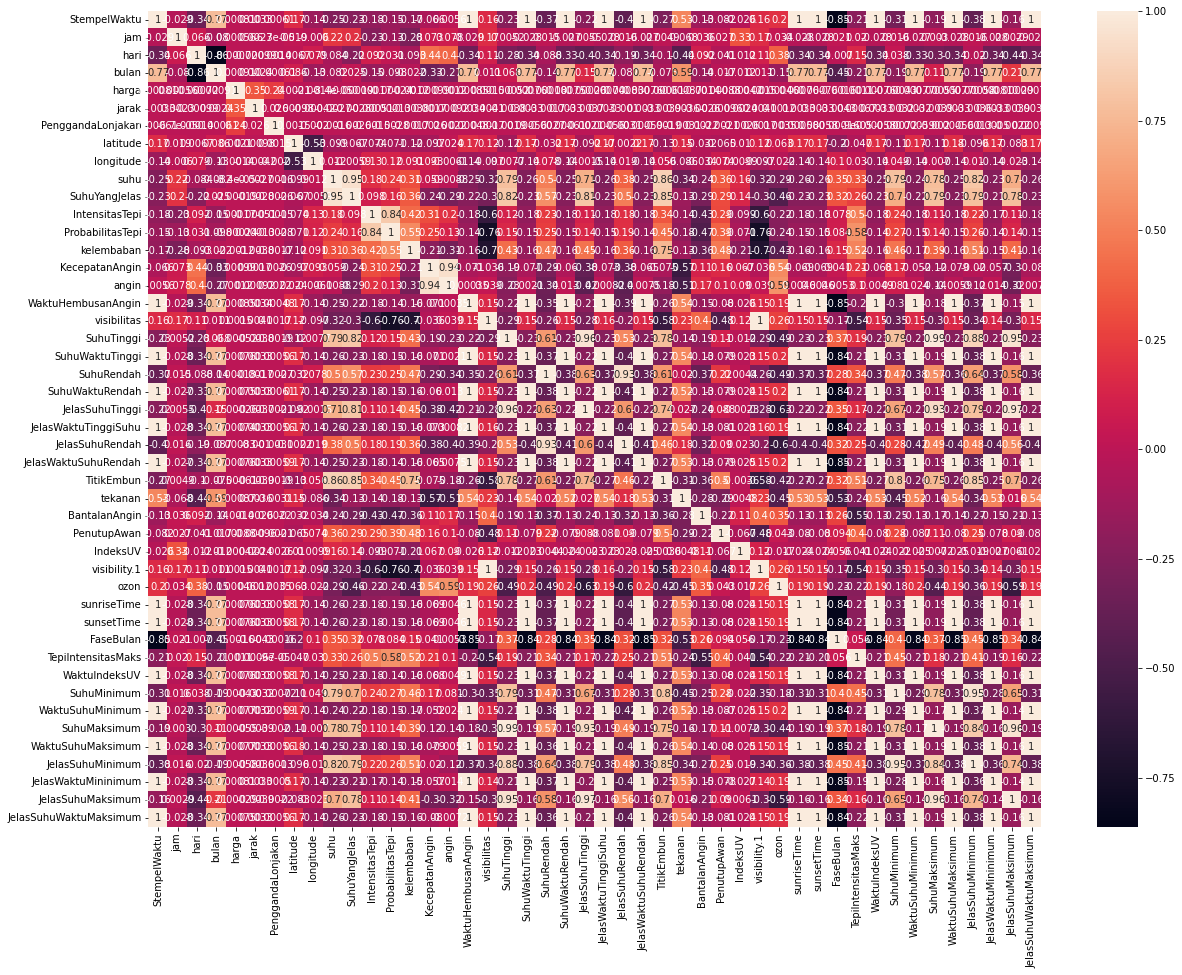

In [37]:
plt.figure(figsize=(20,15))
sns.heatmap(data.corr(), annot=True)
plt.show()

Berdasarkan pengecekan korelasi harga terhadap variabel fitur, bahwa kolom/fitur Jarak dan PenggandaLonjakan memiliki korelasi terhadap target harga.

In [38]:
# Menggunakan variabel yang terdapat korelasi untuk kolom numerik
X_train_Clear=X_train_clear[['jarak','PenggandaLonjakan']]
X_test_Clear= X_test[['jarak','PenggandaLonjakan']]
X_train_Clear

,jarak,PenggandaLonjakan
253320,3.39,1.0
138855,3.15,1.0
613966,1.13,1.0
535885,2.10,1.0
466728,1.35,1.0
...,...,...
533660,1.99,1.0
105595,4.48,1.0
617841,0.72,1.0
443712,4.55,1.0


In [39]:
X_test_Clear

,jarak,PenggandaLonjakan
604244,2.86,1.0
436711,3.22,1.0
582025,2.30,1.0
404757,2.96,1.0
84602,0.61,1.0
...,...,...
89435,1.21,1.0
610090,3.53,1.0
51949,1.43,1.0
31560,3.30,1.0


### d1-Memisahkan Antara Kolom Numerik dan Kolom Kategorik

In [40]:
# Dapatkan Variabel Baru Kolom Numerik dan Kolom Kategorik

KolomNumerik = X_train_Clear.select_dtypes(include=np.number).columns.tolist()
KolomKategorik = X_train_clear.select_dtypes(include=['object']).columns.tolist()

print('Kolom Numerik dari dataset rideshare : ', KolomNumerik)
print('------------------------------------------------------------------------------------------------')
print('Kolom Kategorik dari dataset rideshare : ', KolomKategorik)

Kolom Numerik dari dataset rideshare :  ['jarak', 'PenggandaLonjakan']
------------------------------------------------------------------------------------------------
Kolom Kategorik dari dataset rideshare :  ['id', 'TanggalWaktu', 'ZonaWaktu', 'sumber', 'tujuan', 'cab_type', 'product_id', 'nama', 'RingkasanSingkat', 'RingkasanPanjang', 'icon']


Untuk melihat kolom yang numerik dan melihat kolom yang kategorik. jadi memisahkan antara numerical dan kategorikal.

In [41]:
# buat variabel x_train untuk numerik/kategorik dan buat variabel x_train untuk numerik/kategorik

X_train_num = X_train_Clear[KolomNumerik]
X_train_cat = X_train_clear[KolomKategorik]

X_test_num = X_test[KolomNumerik]
X_test_cat = X_test[KolomKategorik]

## e - Feature Scaling

Dikutip dari medium.com, Feature Scaling adalah suatu cara untuk membuat numerical data pada dataset memiliki rentang nilai (scale) yang sama. Tidak ada lagi satu variabel data yang mendominasi variabel data lainnya.

In [42]:
# Menampilkan X_train_num 
X_train_num 

,jarak,PenggandaLonjakan
253320,3.39,1.0
138855,3.15,1.0
613966,1.13,1.0
535885,2.10,1.0
466728,1.35,1.0
...,...,...
533660,1.99,1.0
105595,4.48,1.0
617841,0.72,1.0
443712,4.55,1.0


In [43]:
X_test_num

,jarak,PenggandaLonjakan
604244,2.86,1.0
436711,3.22,1.0
582025,2.30,1.0
404757,2.96,1.0
84602,0.61,1.0
...,...,...
89435,1.21,1.0
610090,3.53,1.0
51949,1.43,1.0
31560,3.30,1.0


x_train_num harus di scaling , agar tidak melihat data kolom dengan nilai paling besar saja. semua besaran indeks dari puluhan, ratusan dan jutaanya menjadi setara.

In [44]:
# Feature Scaling using MinMaxScaler

scaler = MinMaxScaler() # Nilainya di ubah skalanya menjadi 0 sampai 1
scaler.fit(X_train_num) # .fit itu proses tranning untuk mencari kolom yang akan di ubah scaler nya, .fit hanya di gunakan untuk X_train dan tidak untuk X_test
# fit itu proses pencarian batas 0 dan batas 1 

X_train_num_scaled = scaler.transform(X_train_num) #setelah di lakukan scaler baru di transform/mengubah nilainya menjadi 0 sampai 1
X_test_num_scaled = scaler.transform(X_test_num)
X_train_num_scaled

array([[0.62407407, 0.        ],
       [0.57962963, 0.        ],
       [0.20555556, 0.        ],
       ...,
       [0.12962963, 0.        ],
       [0.83888889, 0.        ],
       [0.16481481, 0.        ]])

In [45]:
X_test_num_scaled

array([[0.52592593, 0.        ],
       [0.59259259, 0.        ],
       [0.42222222, 0.        ],
       ...,
       [0.26111111, 0.        ],
       [0.60740741, 0.        ],
       [0.58333333, 0.        ]])

## f - Feature Encoding

Feature encoding proses pengubahan suatu data berupa kategorik yang akan diubah menjadi bentuknya menjadi numerik/angka, karena dalam meachine learning tidak bisa memproses suatu string . Jadi harus di ubah ke angka, salah satu caranya orginaencoding

In [46]:
# Menampilkan X_train_cat 
X_train_cat

,id,TanggalWaktu,ZonaWaktu,sumber,tujuan,cab_type,product_id,nama,RingkasanSingkat,RingkasanPanjang,icon
253320,047be0a9-503f-44e4-b411-849fd3803a93,2018-11-27 15:15:24,America/New_York,Boston University,North Station,Uber,6d318bcc-22a3-4af6-bddd-b409bfce1546,Black SUV,Overcast,Light rain in the morning.,cloudy
138855,1ad80077-a02e-4c64-9787-4c27242beebf,2018-12-02 22:32:57,America/New_York,North Station,Boston University,Lyft,lyft_plus,Lyft XL,Overcast,Light rain until evening.,cloudy
613966,1a86158e-8565-4ccb-b8e0-9350f69aadaf,2018-11-30 02:27:58,America/New_York,North End,North Station,Lyft,lyft_lux,Lux Black,Clear,Partly cloudy throughout the day.,clear-night
535885,86da575c-c8fb-48c8-ac0e-ee82093e0858,2018-11-28 22:13:42,America/New_York,Boston University,Back Bay,Lyft,lyft_premier,Lux,Overcast,Mostly cloudy throughout the day.,cloudy
466728,c4841677-b60e-44b7-8104-454089dcd3bd,2018-12-01 06:48:04,America/New_York,Beacon Hill,Haymarket Square,Uber,6f72dfc5-27f1-42e8-84db-ccc7a75f6969,UberXL,Overcast,Light rain in the morning and overnight.,cloudy
...,...,...,...,...,...,...,...,...,...,...,...
533660,a9f8a2c1-890e-4dd7-b9ba-c9ccfee3707d,2018-12-02 22:52:58,America/New_York,Haymarket Square,Back Bay,Lyft,lyft_lux,Lux Black,Overcast,Light rain until evening.,cloudy
105595,d2137e10-b014-490c-b303-0e536612cabc,2018-11-28 18:08:07,America/New_York,Financial District,Fenway,Uber,6f72dfc5-27f1-42e8-84db-ccc7a75f6969,UberXL,Overcast,Mostly cloudy throughout the day.,cloudy
617841,fc11fc08-6109-4041-8173-a3ff9b7a15a1,2018-12-14 22:40:11,America/New_York,West End,Haymarket Square,Lyft,lyft_premier,Lux,Mostly Cloudy,Partly cloudy throughout the day.,partly-cloudy-night
443712,e3a8e9b1-f25f-4574-adc8-0f6e9a0191bc,2018-12-02 03:27:58,America/New_York,Northeastern University,Financial District,Uber,6c84fd89-3f11-4782-9b50-97c468b19529,Black,Mostly Cloudy,Light rain in the morning and overnight.,partly-cloudy-night


In [47]:
# Menampilkan X_test_cat 
X_test_cat

,id,TanggalWaktu,ZonaWaktu,sumber,tujuan,cab_type,product_id,nama,RingkasanSingkat,RingkasanPanjang,icon
604244,de901160-0bda-47e4-875d-50eaf7265afc,2018-11-30 09:28:00,America/New_York,Northeastern University,West End,Uber,55c66225-fbe7-4fd5-9072-eab1ece5e23e,UberX,Clear,Mostly cloudy throughout the day.,clear-night
436711,0de6c99a-3f79-4867-ae74-e65337ccee23,2018-12-16 17:45:09,America/New_York,Northeastern University,North Station,Uber,997acbb5-e102-41e1-b155-9df7de0a73f2,UberPool,Overcast,Rain throughout the day.,cloudy
582025,e28fa06d-720b-4b8c-8256-194dd397d4c8,2018-12-03 05:22:58,America/New_York,Haymarket Square,Back Bay,Uber,997acbb5-e102-41e1-b155-9df7de0a73f2,UberPool,Foggy,Foggy in the morning.,fog
404757,a8cf5eb0-7a22-4a9d-8e3f-86a8a9e06d59,2018-12-02 17:47:57,America/New_York,Fenway,Beacon Hill,Uber,9a0e7b09-b92b-4c41-9779-2ad22b4d779d,WAV,Light Rain,Light rain until evening.,rain
84602,6a3ce81c-46c4-43df-9738-43964e3c9c10,2018-11-30 20:33:08,America/New_York,Haymarket Square,West End,Uber,9a0e7b09-b92b-4c41-9779-2ad22b4d779d,WAV,Overcast,Mostly cloudy throughout the day.,cloudy
...,...,...,...,...,...,...,...,...,...,...,...
89435,e1a93ba7-a586-4fb1-bc1b-ef9df16cb095,2018-11-30 07:48:04,America/New_York,Financial District,North End,Uber,55c66225-fbe7-4fd5-9072-eab1ece5e23e,UberX,Clear,Mostly cloudy throughout the day.,clear-night
610090,2efef573-99af-4314-91a1-0678a3b76b9c,2018-12-01 07:18:02,America/New_York,South Station,Back Bay,Uber,6f72dfc5-27f1-42e8-84db-ccc7a75f6969,UberXL,Overcast,Light rain in the morning and overnight.,cloudy
51949,238659e1-5a2d-47a0-b938-b33f3f5bc49a,2018-11-29 21:32:56,America/New_York,Back Bay,Boston University,Uber,997acbb5-e102-41e1-b155-9df7de0a73f2,UberPool,Partly Cloudy,Partly cloudy throughout the day.,partly-cloudy-night
31560,45478204-b84c-4424-837f-1d19efc078c0,2018-12-14 09:15:05,America/New_York,North Station,Northeastern University,Uber,6d318bcc-22a3-4af6-bddd-b409bfce1546,Black SUV,Partly Cloudy,Partly cloudy throughout the day.,partly-cloudy-night


In [48]:
# Mari kita periksa kardinalitas, ini adalah jumlah label yang berbeda, untuk variabel kategori yang berbeda
print('---------------------------------- KATEGORIK X_TRAIN ------------------------------------')
print('Number of categories in the variable id               : {}'.format(len(X_train_cat.id.unique())))
print('Number of categories in the variable Tanggal Waktu    : {}'.format(len(X_train_cat.TanggalWaktu.unique())))
print('Number of categories in the variable Zona Waktu       : {}'.format(len(X_train_cat.ZonaWaktu.unique())))
print('Number of categories in the variable Sumber           : {}'.format(len(X_train_cat.sumber.unique())))
print('Number of categories in the variable Tujuan           : {}'.format(len(X_train_cat.tujuan.unique())))
print('Number of categories in the variable Cab Type         : {}'.format(len(X_train_cat.cab_type.unique())))
print('Number of categories in the variable product_id       : {}'.format(len(X_train_cat.product_id.unique())))
print('Number of categories in the variable nama             : {}'.format(len(X_train_cat.nama.unique())))
print('Number of categories in the variable RingkasanSingkat : {}'.format(len(X_train_cat.RingkasanSingkat.unique())))
print('Number of categories in the variable RingkasanPanjang : {}'.format(len(X_train_cat.RingkasanPanjang.unique())))
print('Number of categories in the variable icon             : {}'.format(len(X_train_cat.icon.unique())))
print('             ')
print('---------------------------------- KATEGORIK X_TEST ------------------------------------')
# Mari kita periksa kardinalitas, ini adalah jumlah label yang berbeda, untuk variabel kategori yang berbeda
print('Number of categories in the variable id               : {}'.format(len(X_test_cat.id.unique())))
print('Number of categories in the variable Tanggal Waktu    : {}'.format(len(X_test_cat.TanggalWaktu.unique())))
print('Number of categories in the variable Zona Waktu       : {}'.format(len(X_test_cat.ZonaWaktu.unique())))
print('Number of categories in the variable Sumber           : {}'.format(len(X_test_cat.sumber.unique())))
print('Number of categories in the variable Tujuan           : {}'.format(len(X_test_cat.tujuan.unique())))
print('Number of categories in the variable Cab Type         : {}'.format(len(X_test_cat.cab_type.unique())))
print('Number of categories in the variable product_id       : {}'.format(len(X_test_cat.product_id.unique())))
print('Number of categories in the variable nama             : {}'.format(len(X_test_cat.nama.unique())))
print('Number of categories in the variable RingkasanSingkat : {}'.format(len(X_test_cat.RingkasanSingkat.unique())))
print('Number of categories in the variable RingkasanPanjang : {}'.format(len(X_test_cat.RingkasanPanjang.unique())))
print('Number of categories in the variable icon             : {}'.format(len(X_test_cat.icon.unique())))

---------------------------------- KATEGORIK X_TRAIN ------------------------------------
Number of categories in the variable id               : 510372
Number of categories in the variable Tanggal Waktu    : 31350
Number of categories in the variable Zona Waktu       : 1
Number of categories in the variable Sumber           : 12
Number of categories in the variable Tujuan           : 12
Number of categories in the variable Cab Type         : 2
Number of categories in the variable product_id       : 12
Number of categories in the variable nama             : 12
Number of categories in the variable RingkasanSingkat : 9
Number of categories in the variable RingkasanPanjang : 11
Number of categories in the variable icon             : 7
             
---------------------------------- KATEGORIK X_TEST ------------------------------------
Number of categories in the variable id               : 127594
Number of categories in the variable Tanggal Waktu    : 28600
Number of categories in the va

Berdasatkan personal judgment, saya hanya memilih beberapa fitur kategorik yang akan memprediksi nilai suatu target. Berikut beberapa fitur yang dipilih beserta alasannya :
1. Sumber, sebagai titik awal perjalanan yang masuk ke sistem aplikasi jasa pelayanan atau mendapatkan orderan pengantaran penumpang. Fitur ini menjadi pengaruh awal mengenai harga perjalanan, misalnya harga perjalanan sumber dimulai dari terminal akan lebih murah di bandingkan sumber dimulai dari titik jemput rumah.
2. Tujuan, sebagai titik akhir dari suatu sistem aplikasi jasa pelayanan atau supir telah menyelesaikan perjalanan yang menjadi tujuan tempat berhentinya penumpang. Fitur ini menjadi pengaruh mahal/murah harga perjalan, semakin jauh tujuan penumpang maka akan semakin mahall biayanya begitu pula sebaliknya.
3. Cab_type, seperti yang telah saya jelaskan di bagian EDA bahwa terdapat 2 jenis aplikasi jasa pelayanan transfortasi terbesar di amerika. Fitur ini bisa memiliki pengaruh harga perjalanan, seperti jasa pelayan uber dan lfyt . Masing-masing kedua jasa pelayanan transfortasi pasti memiliki sistem perhitungan harga yang berbeda-beda. Seperti paket pelayanana transfortasi dan diskon potongan harga di kedua jasa layanan tersebut pasti berbeda satu sama lain. Bisa jadi uber lebih mahal harganya di bandingkan lfyt, begitu juga sebaliknya. 
4. Nama, Fitur ini bisa memiliki pengaruh mengenai harga perjalanan. Misalkan nama taksi/kendaraan/bis tersebut memiliki fasilitas AC/Toilet Kecil/Tempat Duduk Empuk/Tempat Duduk Kuris Panjang akan memiliki harga perjalanan yang lebih mahal, jika di bandingkan dengan nama taksi/kendaraan/bis yang tidak ada fasilitas tesedia. Misalnya mobil taksi BMW harganya lebih mahal di bandingkan mobil taksi Convertible.
5. icon, fitur ini bisa memiliki pengaruh mengenai harga perjalanan. Fitur data icon menjalaskan mengenai situasi perjalanan ketika dilakukan seperti berawan, hujan, terik, malam, berkabut dan lain-lain. Harga Perjalanan lebih tinggi jika dilakukan saat turun hujan, misalkan sistem taksi berdasarkan durasi akan lebih mahal karena terkendalan kondisi.

Membuat variabel baru yang hanya menggunakan fitur kategorik yang dibutuhkan

In [49]:
X_train_Cat=X_train_cat[['sumber','tujuan','cab_type','nama','icon']]
X_test_Cat= X_test_cat[['sumber','tujuan','cab_type','nama','icon']]

In [50]:
X_train_Cat

,sumber,tujuan,cab_type,nama,icon
253320,Boston University,North Station,Uber,Black SUV,cloudy
138855,North Station,Boston University,Lyft,Lyft XL,cloudy
613966,North End,North Station,Lyft,Lux Black,clear-night
535885,Boston University,Back Bay,Lyft,Lux,cloudy
466728,Beacon Hill,Haymarket Square,Uber,UberXL,cloudy
...,...,...,...,...,...
533660,Haymarket Square,Back Bay,Lyft,Lux Black,cloudy
105595,Financial District,Fenway,Uber,UberXL,cloudy
617841,West End,Haymarket Square,Lyft,Lux,partly-cloudy-night
443712,Northeastern University,Financial District,Uber,Black,partly-cloudy-night


In [51]:
X_test_Cat

,sumber,tujuan,cab_type,nama,icon
604244,Northeastern University,West End,Uber,UberX,clear-night
436711,Northeastern University,North Station,Uber,UberPool,cloudy
582025,Haymarket Square,Back Bay,Uber,UberPool,fog
404757,Fenway,Beacon Hill,Uber,WAV,rain
84602,Haymarket Square,West End,Uber,WAV,cloudy
...,...,...,...,...,...
89435,Financial District,North End,Uber,UberX,clear-night
610090,South Station,Back Bay,Uber,UberXL,cloudy
51949,Back Bay,Boston University,Uber,UberPool,partly-cloudy-night
31560,North Station,Northeastern University,Uber,Black SUV,partly-cloudy-night


### f1-Mengubah Kolom Kategorik menjadi Numerik

Berdasarkan fitur-fitur yang telah di seleksi, maka akan diubah menjadi bentuk numerik.

In [52]:
from sklearn.preprocessing import OneHotEncoder
encoder = OneHotEncoder()
encoder.fit(X_train_Cat)
X_train_Cat_encoded = encoder.transform(X_train_Cat).toarray()
X_test_Cat_encoded = encoder.transform(X_test_Cat).toarray()
X_train_Cat_encoded

array([[0., 0., 1., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 1., 0.],
       [0., 0., 0., ..., 0., 1., 0.],
       [0., 0., 0., ..., 0., 0., 1.]])

### f2-Menggabungkan Kolom numerik dan Kolom kategorik

Kolom numerik dan kolom kategorik yang skala nya sudah sama semua, akan di gabungkan menjadi X_train_final dan X_test_final.

In [53]:
# mengabungkan kolom numerik dengan kolom kategorical

X_train_final = np.concatenate([X_train_num_scaled, X_train_Cat_encoded], axis=1)
X_test_final = np.concatenate([X_test_num_scaled, X_test_Cat_encoded], axis=1)
X_train_final

array([[0.62407407, 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.57962963, 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.20555556, 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       ...,
       [0.12962963, 0.        , 0.        , ..., 0.        , 1.        ,
        0.        ],
       [0.83888889, 0.        , 0.        , ..., 0.        , 1.        ,
        0.        ],
       [0.16481481, 0.        , 0.        , ..., 0.        , 0.        ,
        1.        ]])

# 6 - Model Definition

> Bagian ini berisi cell untuk mendefinisikan model. Jelaskan alasan menggunakan suatu algoritma/model, hyperparameter yang dipakai, jenis penggunaan metrics yang dipakai, dan hal lain yang terkait dengan model.

Model Definition yang saya gunakan adalah linear regresi. Karena Linear Regresi dapat digunakan untuk mengetahui arah dari hubungan antara Target dengan fitur, berdasarkan proses visualisasi headmap sebelumnya terdapat fitur yang memiliki hubungan positif untuk memprediksi nilai dari variabel target. Berdasarkan hal ini maka saya akan mendefinisikan modelnya berupa linear regresi dan utuk matriks yang digunakan berupa MAE dan R2.

In [54]:
# Training using Linear Regression
# Algoritma yang akan di gunakan untuk memproses data adalah linear regression dan metrics yang digunakan adalah MAE

model_lin_reg = LinearRegression()

# 7 - Model Training

> Cell pada bagian ini hanya berisi code untuk melatih model dan output yang dihasilkan. Lakukan beberapa kali proses training dengan hyperparameter yang berbeda untuk melihat hasil yang didapatkan. Analisis dan narasikan hasil ini pada bagian Model Evaluation.

In [55]:
# Train the Model

model_lin_reg.fit(X_train_final, y_train) # .fit nya harus X_train_final yang sudah di scalling dan encoding dengan y-train

LinearRegression()

# 8 - Model Evaluation

> Pada bagian ini, dilakukan evaluasi model yang harus menunjukkan bagaimana performa model berdasarkan metrics yang dipilih. Hal ini harus dibuktikan dengan visualisasi tren performa dan/atau tingkat kesalahan model. Lakukan analisis terkait dengan hasil pada model dan tuliskan hasil analisisnya.

In [56]:
# Prediksi dari Train-Set and Test-Set

y_pred_train = model_lin_reg.predict(X_train_final) # memprediksi model train
y_pred_test = model_lin_reg.predict(X_test_final) # memprediksi model test

In [57]:
# Model Evaluation menggunakan MAE
# Berdasarkan matrics MAE akan kita lihat seberapa besar error model yang di hasilkan, semakin nilainya mendekati nol maka model prediksi akan baik.

print('Error - Train Set : ', mean_absolute_error(y_train, y_pred_train)) #membandingkan y_train dengan y_pred_train
print('Error - Test Set  : ', mean_absolute_error(y_test, y_pred_test)) #membandingkan y_test dengan y_pred_test

Error - Train Set :  1.929739049828519
Error - Test Set  :  1531342865.2040648


In [58]:
# Model Evaluation menggunakan R2
# Berdasarkan matriks R2 akan kita lihat seberapa besar variabel fitur mempengaruhi variabel target, semakin nilainy amendekati satu maka model prediksi akan baik

print('r2score train = ', r2_score(y_train, y_pred_train))
print('r2score test = ', r2_score(y_test, y_pred_test))

r2score train =  0.8948130185635081
r2score test =  -1.1448440581496855e+18


Model Evaluation yang di hasilkan bahwa variabel fitur memiliki pengaruh persentase sebesar 42% terhadap variabel target.

# 9 - Model Inference

> Model yang sudah dilatih akan dicoba pada data yang bukan termasuk ke dalam train-set ataupun test-set. Data ini harus dalam format yang asli, bukan data yang sudah di-scaled.

In [59]:
# Save the Files

import joblib
import json

with open('model_lin_reg.pkl', 'wb') as file_1:
  joblib.dump(model_lin_reg, file_1) # variabel model_lin_reg akan di dump /save jadi model_lin_reg.pkl

with open('model_scaler.pkl', 'wb') as file_2:
  joblib.dump(scaler, file_2) # variabel scaler akan di dump /save jadi scaler.pkl

with open('model_encoder.pkl', 'wb') as file_3:
  joblib.dump(encoder, file_3) # variabel encoder akan di dump /save jadi encoder.pkl

with open('list_num_cols.txt', 'w') as file_4:
  json.dump(KolomNumerik, file_4) # variabel num_columns akan di dump /save jadi num_columns.txt

with open('list_cat_cols.txt', 'w') as file_5:
  json.dump(KolomKategorik, file_5) # variabel cat_columns akan di dump /save jadi cat_columns.txt

In [60]:
KolomKategorik

['id',
 'TanggalWaktu',
 'ZonaWaktu',
 'sumber',
 'tujuan',
 'cab_type',
 'product_id',
 'nama',
 'RingkasanSingkat',
 'RingkasanPanjang',
 'icon']

## a - Loading Model

In [61]:
# Load All Files
import joblib
import json

with open('model_lin_reg.pkl', 'rb') as file_1:
  model_lin_reg = joblib.load(file_1)

with open('model_scaler.pkl', 'rb') as file_2:
  model_scaler = joblib.load(file_2)

with open('model_encoder.pkl', 'rb') as file_3:
  model_encoder = joblib.load(file_3)

with open('list_num_cols.txt', 'r') as file_4:
  list_num_cols = json.load(file_4)

with open('list_cat_cols.txt', 'rb') as file_5:
  list_cat_cols = json.load(file_5)

## b - Loading Data Inference

In [62]:
# Sebelum inference kita tampilkan dulu data inference yang di awal
datainfernce

,id,StempelWaktu,jam,hari,bulan,TanggalWaktu,ZonaWaktu,sumber,tujuan,cab_type,...,TepiIntensitasMaks,WaktuIndeksUV,SuhuMinimum,WaktuSuhuMinimum,SuhuMaksimum,WaktuSuhuMaksimum,JelasSuhuMinimum,JelasWaktuMininimum,JelasSuhuMaksimum,JelasSuhuWaktuMaksimum
0,1e45e179-546a-48a9-9c48-3af210ba4067,1.543362e+09,23,27,11,2018-11-27 23:42:22,America/New_York,Back Bay,Boston University,Lyft,...,0.1438,1543338000,36.37,1543377600,46.74,1543320000,32.60,1543377600,43.93,1543320000
1,44fd1122-034f-416c-a90e-f965c2aa1fef,1.543627e+09,1,1,12,2018-12-01 01:13:08,America/New_York,South Station,Theatre District,Lyft,...,0.0004,1543593600,28.42,1543579200,42.05,1543600800,29.07,1543579200,41.38,1543600800
2,1c70a635-5cc2-462b-a650-ecf99c4dc249,1.543776e+09,18,2,12,2018-12-02 18:33:03,America/New_York,South Station,Theatre District,Uber,...,0.0894,1543770000,36.40,1543726800,50.94,1543788000,35.78,1543748400,50.27,1543788000
3,689accd2-480a-4b9d-ba74-c30f568d31b6,1.543331e+09,15,27,11,2018-11-27 15:09:22,America/New_York,Theatre District,North End,Uber,...,0.1422,1543338000,35.90,1543377600,46.72,1543320000,31.81,1543377600,43.70,1543320000
4,17989773-8ee3-4e20-a816-6082be328726,1.543608e+09,19,30,11,2018-11-30 19:53:14,America/New_York,Beacon Hill,Boston University,Lyft,...,0.0004,1543593600,28.64,1543575600,42.57,1543600800,27.20,1543568400,40.51,1543611600
5,54019c66-428f-4805-9053-8672a37eb914,1.544723e+09,17,13,12,2018-12-13 17:50:14,America/New_York,North End,West End,Uber,...,0.0001,1544716800,17.91,1544688000,33.81,1544731200,13.47,1544688000,32.82,1544734800
6,88a4920b-df82-4dad-af3f-c88afab096ec,1.544878e+09,12,15,12,2018-12-15 12:50:11,America/New_York,South Station,Beacon Hill,Uber,...,0.0079,1544893200,39.71,1544929200,54.43,1544896800,36.49,1544929200,53.76,1544896800
7,6f7d44a1-f3d3-4a69-9acf-6085e5930df5,1.544820e+09,20,14,12,2018-12-14 20:35:05,America/New_York,Financial District,North End,Lyft,...,0.0000,1544806800,27.07,1544788800,46.45,1544814000,27.72,1544788800,43.71,1544817600
8,5d8920a7-8b94-49f8-b15b-b68244caea16,1.543278e+09,0,27,11,2018-11-27 00:15:12,America/New_York,Boston University,North Station,Lyft,...,0.1225,1543251600,40.45,1543233600,46.49,1543255200,37.17,1543291200,43.84,1543244400
9,003594e9-8b16-4f15-9529-f9f0406d3f6c,1.543537e+09,0,30,11,2018-11-30 00:22:56,America/New_York,South Station,Theatre District,Lyft,...,0.0000,1543510800,34.84,1543550400,45.12,1543510800,30.80,1543550400,39.02,1543510800


## c - Feature Scaling Data Inference

In [63]:
# memisahkan columns numerikal dan kategorikal data_inference

data_inf_num = datainfernce[list_num_cols]
data_inf_cat = datainfernce[['sumber','tujuan','cab_type','nama','icon']]

In [64]:
data_inf_num_scaled = scaler.transform(data_inf_num)
data_inf_num_scaled

array([[0.27407407, 1.        ],
       [0.20555556, 0.        ],
       [0.23703704, 0.        ],
       [0.28703704, 0.        ],
       [0.42407407, 0.        ],
       [0.25925926, 0.        ],
       [0.45925926, 0.        ],
       [0.22037037, 0.        ],
       [0.64444444, 0.        ],
       [0.21481481, 0.        ]])

## d - Feature Encoding Data Inference

In [65]:
data_inf_cat

,sumber,tujuan,cab_type,nama,icon
0,Back Bay,Boston University,Lyft,Lux Black XL,partly-cloudy-night
1,South Station,Theatre District,Lyft,Lux Black XL,cloudy
2,South Station,Theatre District,Uber,UberX,rain
3,Theatre District,North End,Uber,UberPool,cloudy
4,Beacon Hill,Boston University,Lyft,Shared,cloudy
5,North End,West End,Uber,UberPool,partly-cloudy-day
6,South Station,Beacon Hill,Uber,UberX,cloudy
7,Financial District,North End,Lyft,Lux Black XL,partly-cloudy-day
8,Boston University,North Station,Lyft,Shared,rain
9,South Station,Theatre District,Lyft,Lyft,clear-night


In [66]:
data_inf_Cat_encoded = encoder.transform(data_inf_cat).toarray()
data_inf_Cat_encoded

array([[1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 1., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 1., 0., 1., 0., 0., 0., 0., 0., 1., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 1., 0., 0., 1., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 1.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0.,
        0., 0., 1., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0.,
        0., 0., 1., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0.,
        0., 1., 0., 0., 0., 0., 0., 

In [67]:
# data final inference yang akan di prediksi

data_inference_final = np.concatenate([data_inf_num_scaled, data_inf_Cat_encoded], axis=1)
data_inference_final

array([[0.27407407, 1.        , 1.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 1.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 1.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 1.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        1.        , 0.        ],
       [0.20555556, 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 1.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 1.        ,
        0.     

## e - Model Evaluation Data Inference

In [68]:
y_pred_inf = model_lin_reg.predict(data_inference_final)
y_pred_inf

array([-1.04556608e+11,  2.94322424e+01,  7.45011330e+00,  7.55346489e+00,
        5.83075142e+00,  6.69956398e+00,  1.04492054e+01,  2.97513943e+01,
        9.80447960e+00,  6.90487099e+00])

In [69]:
# Predict using Linear Regression untuk data inference

y_pred_inf_df = pd.DataFrame(y_pred_inf, columns=['Prediksi Harga'])
y_pred_inf_df

,Prediksi Harga
0,-1.045566e+11
1,2.943224e+01
2,7.450113e+00
3,7.553465e+00
4,5.830751e+00
5,6.699564e+00
6,1.044921e+01
7,2.975139e+01
8,9.804480e+00
9,6.904871e+00


In [70]:
datainfernce.harga

0    55.0
1    26.0
2     8.5
3     7.0
4     7.0
5     8.5
6     9.5
7    26.0
8     3.5
9     7.0
Name: harga, dtype: float64

# 10 - Penarikkan Kesimpulan

> Pada bagian terakhir ini, harus berisi kesimpulan yang mencerminkan hasil yang didapat dengan objective yang sudah ditulis di bagian pengenalan.

## a - Kesimpulan Exploratory Data Analysis (EDA)

1. Berdasarkan visualisasi histogram data harga penjalanan di Boston MA Amerika cendrung menunjukkan kisaran harga sebesar 11 dolar sampai 16 dolar, sudah terjadi transaksi jasa pelayanan sebanyak 130000 kali. Untuk kisaran harga perjalanan sebesar 5 dolar sampai 10 sudah terjadi transaksi jasa pelayanan sebanyak 110000 kali. Hal ini menunjukkan bahwa harga perjalanan rideshare pada kota Baston MA Amerika memiliki kisarahn harga 11-16 dolar. Informasi untuk masyarakat para wisatawan yang ingin mengujungi baston bisa memperkirakan harga perjalanan antar sumber sampai tujuan daerah yang ingin dikunjungi, jika ingin berkeliling kota Baston menggunakan jasa pelayanan transfortasi.
2. Berdasarkan bentuk grafik hubungan antara suhu rendah dengan suhu tinggi yang dihasilkan. Bahwa Suhu Tinggi tehadap Suhu Rendah akan mengakibatkan tingkat keburukan harga perjalanan yang tinggi, terlihat dari visualisasi yang semakin meningkat keatas. Jadi jika ingin mengurangi tingkat kemahalan harga perjalanan, salah satu tindakan yang harus dilakukan adalah mengurangi perjalanan di suhu tinggi. Informasi untuk masyarakat yang ingin melakukan perjalanan disarankan untuk tidak melakukan perjalanan ketika suhu udara sangat tinggi, karena mesin dan ban mobil akan panas, sehingga juga menimbulkan harga perjalanan yang cukup tinggi.
3. Cab_type yang tersedia di Kota Boston MA Amerika adaah uber dan lyft. Dimana para pelanggan lebih mendominasi menggunakan jasa pelayanan uber sebesar 55.65% sedangkan jasa pelayan lyft berada di bawah uber dengan jumlah penlanggan yang menggunakan sebesar 44.35%. Berdasarkan informasi ini, masayarakat bisa memilih kedua jasa penyediaan pelayanan transfortasi, bisa memilih uber ataupun memilih lyft.


# b - Kesimpulan Model Evaluation

1. Besaran nilai R Square X_train adalah 0.8948 atau sama dengan 89.48%. Angka tesebut mengandung arti bahwa variabel/fitur sumber,	variabel/fitur tujuan, variabel/fitur	cab_type, variabel/fitur	nama dan variabel/fitur icon secara bersama-sama atau mampu menjelaskan pengaruh terhadap variabel/target harga sebesar 89.48%. Sedangkan sisanya (100%-89.48%=10.52%) dipengaruhi oleh variabel/fitur yang tidak diteliti. Sedangkan MAE X_ratin 1.92, yang berarti bahwa keakuratan model evaluation dapai melakukan prediksi dengan kesaah paling kecil 1.9.
2. Nilai MAE X_test sebesar 15311342865 dan R square X_test sebesar -1.1448e+18. Menyatakan bahwa model evluation memiliki kondisi Overfit, yang artinya performansi pada proses training bagus tetapi pada proses testing tidak bagus. Niai X_train dan X_test terbilang berbeda besar, sehingga model dapat di terima sebesar 89,48% tetpi tidak bisa selalu memprediksi niai dengan baik.